# <span style="color:green"> 300320 Análisis sobre Twitter -Producción-.</span>
#### Autores: Christian Castro Macarena Herrera. 
#### Fecha: 30 de Marzo del 2020.
#### Propietario: Data-Intelligence International.

# Índice:
## I Extracción
### 1. Extracciones básicas.
### 2. Profundizando en la extracción y limpieza de los tweets.
## II Limpieza
## III Análisis de sentimientos
### 1. Análisis de sentimientos I
### 2. Análisis de sentimientos II
### 3. Bigramas
## IV Procesamiento del lenguaje natural

# I Primera parte: Introducción, consultas básicas.

### 1.1 Autenticación:

In [ ]:
# Se importan las librerías necesarias:
import tweepy
import sys
import datetime
import csv
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import re 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Se requieren del usuario las credenciales para que pueda acceder a la API Twiteer:
print('Ingrese sus credenciales sin comillas')
consumer_key = input('Consumer Key ')
consumer_secret = input('Consumer Secret ')
access_token = input('Access Token ')
access_token_secret = input('Access Token Secret ')
    
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)    
    
# Se ingresan mis credenciales (Christian Castro) pero sólo para efectos de prueba:
# Cada usuario debe proveerse de las propias:
    
# consumer_key='koO4XqTuWFr5ADGcE8kjIkVoU'
# consumer_secret='3F4sk9qU8zbKBROuLPUUj1uvE2YuhseXPe0ahMQoivg4icN5bL'
# access_token='1230251564616515586-2KqPsCG2mIJp3irRjENgHpCfQUxTUg'
# access_token_secret='6PJfMtYGY7w6csiIX9m1S5jFEKNZ3hE9PVkHKeN1S14iM'    

# Se construye la API Twitter
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
print('-----------------------------------------')
print('Ya está autenticado, por favor, continúe:')
print('-----------------------------------------')
# if api is None
# print('Cerciórese de que sus credenciales sean las correctas y vuelva a intentarlo...')

Ingrese sus credenciales sin comillas


### 1.2 Primera consulta por usuario entre un rango de fechas:

In [188]:
# Ésta primera consulta se ejerce sobre un usuario específico dentro de un intervalo 
# de fechas para obtener todos los tweets que ha emitido:

prompt = '> '
tweet=''

print("ingrese el usuario de Twitter sobre el cual hacer la consulta sin comillas:")
usuario_de_consulta = input(prompt)

print("ingrese fecha de inicio de los tweets")
fecha_de_inicio = input(prompt)
print("ingrese fecha de fin de los tweets")
fecha_de_fin = input(prompt)

j=1

for i in tweepy.Cursor(api.user_timeline, screen_name=usuario_de_consulta, include_rts = True, tweet_mode='extended').items():
    if(str(i.created_at) >= str(fecha_de_inicio) and str(i.created_at) <= str(fecha_de_fin)+str(1)):
        
        print(str(j) +') '+ '\n' +
            'Texto del tweet: '+ i.full_text +' '+'\n' +
            'Creado en : '+str(i.created_at) +' '+'\n' +
            'Id del tweet: '+str(i.id) +' '+'\n' +
            'Número de favoritos: '+str(i.favorite_count) +' '+'\n' +
            'Número de retweets: '+str(i.retweet_count) +' '+'\n' +
            'Favoritos: '+str(i.favorited) +' '+'\n' +
            '¿Usuario autenticado?: '+str(i.retweeted) +' '+'\n' +
            'Idioma: '+str(i.lang) +' '+'\n' +
            'Lugar: '+str(i.place) +' '+'\n' +
            'Coordenadas: '+str(i.coordinates) +' '+'\n' +
            'Geolocalización: '+str(i.geo) +' '+'\n' +
            'Perfil completo del autor: '+str(i.user) +' '+ '\n'+ '\n')
        j= j+1   

        if(i.created_at == str(fecha_de_inicio)):
            break        
    
if tweet == '':
        print('No hay nada que mostrar')
        
# carlosadasme
# 2019-10-18
# 2020-03-18

ingrese el usuario de Twitter sobre el cual hacer la consulta sin comillas:
> carlosadasme
ingrese fecha de inicio de los tweets
> 2019-10-18
ingrese fecha de fin de los tweets
> 2020-03-18
1) 
Texto del tweet: Sumamos nuevas medidas preventivas para reducir el riesgo de contagio de coronavirus (COVID-19) en Isla de Maipo. La colaboración y responsabilidad de los vecinos y vecinas es fundamental. Insistimos a no salir de sus hogares si no es por emergencia o estrictamente necesario. https://t.co/9yhHWiGubN 
Creado en : 2020-03-18 23:05:48 
Id del tweet: 1240414126125563904 
Número de favoritos: 1 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeM

5) 
Texto del tweet: ✅Todos los centros de salud de Isla de Maipo estarán vacunando a nuestros vecinos del grupo de riesgo hasta las 16.00 horas o hasta agotar el stock de vacunas diarias💉

#vacunacontralainfluenza https://t.co/hElnSj6GKE 
Creado en : 2020-03-18 16:04:50 
Id del tweet: 1240308189364658176 
Número de favoritos: 0 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': Fal

25) 
Texto del tweet: 🔴Se coordinará día y horario de vacunación contra la influenza para niños de 6 meses a 10 años de edad con cada establecimiento de educación de Isla de Maipo.

🔴Se coordinará día y horario de visitas a adultos mayores y clubes de adulto mayor para vacunación contra la influenza https://t.co/22I9XQeimS 
Creado en : 2020-03-15 22:07:46 
Id del tweet: 1239312361049260034 
Número de favoritos: 1 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'c

45) 
Texto del tweet: En un histórico Chile que sigue cambiando, la igualdad de género debe ser una constante prioridad. En este 8M, Día Internacional de la Mujer, quiero expresar con mayor fuerza mi apoyo y reconocimiento a todas las mujeres de Isla de Maipo y el país. https://t.co/ClfVOmljtO 
Creado en : 2020-03-08 11:01:17 
Id del tweet: 1236607919522754560 
Número de favoritos: 11 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [

65) 
Texto del tweet: Este sábado 29 de febrero desde las 18 horas realizaremos una nueva reunión general con todos los Comités Habitacionales "Aires del Maipo", en el Liceo República de Italia, para dar a conocer los avances del proyecto. https://t.co/sqFFhzb95B 
Creado en : 2020-02-27 14:22:51 
Id del tweet: 1233034763939827713 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls

85) 
Texto del tweet: Un muy feliz 41° aniversario al sector de Gacitúa, en especial a cada vecino y vecina de esta localidad. Reconocer el trabajo de su actual junta de vecinos, liderada por Fernando Novoa, y recordar a los dirigentes sociales que han entregado su tiempo y dedicación a este sector. https://t.co/GYnq2dvUYc 
Creado en : 2020-02-10 02:49:04 
Id del tweet: 1226699574053670914 
Número de favoritos: 2 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'c

105) 
Texto del tweet: Excelente humor de El Clavel, haciendo reír a todas las familias presentes en nuestro #FestivalDeLaUva2020 con todo su humor y mucha picardía a la chilena. Ya se viene el resultado de la competencia de la voz y Noche de Brujas, con toda su música tropical y sus grandes éxitos. https://t.co/d1PK6YkZEJ 
Creado en : 2020-02-02 03:38:54 
Id del tweet: 1223813014681505793 
Número de favoritos: 3 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'c

125) 
Texto del tweet: Con cabritas y bebidas se realizó una de las salidas más esperadas por todos los niños y niñas de las Escuelas de Verano de Isla de Maipo 2020. Todos los niños de los tres centros pudieron ver y disfrutar de la película "Espías a escondidas". https://t.co/xQZsV9zVjW 
Creado en : 2020-01-29 20:55:16 
Id del tweet: 1222624273115877376 
Número de favoritos: 4 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]

145) 
Texto del tweet: Junto a la concejala @ValeriaManriqu3, entregando un buzo completo y una polera a cada uno de los integrantes del Club Deportivo Social y Cultural Villa El Gomero, proyecto financiado por el 6% del FNDR. Agradecer al Presidente del CORE @fberriosu por su constante apoyo. https://t.co/XQsIpxtdW6 
Creado en : 2020-01-25 22:11:53 
Id del tweet: 1221194002764128258 
Número de favoritos: 5 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosa

165) 
Texto del tweet: En el verano de Isla de Maipo 2020, llega una gran obra a nuestra Plaza de Armas mañana viernes 23 de enero a las 21 hrs. Del teatro San Ginés llega "La Verdad", comedia contemporánea con los reconocidos actores Pancho Melo, Francisca Imboden, Daniela Lhorente y Juan Pablo Sáez. https://t.co/ZC98XFnV7h 
Creado en : 2020-01-23 22:16:53 
Id del tweet: 1220470484762009600 
Número de favoritos: 4 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 

185) 
Texto del tweet: RT @BIsladeMaipo196: Hoy comenzó el Taller de Creación de Libro-Cuentos actividad enmarcada en las iniciativas de Vacaciones de Verano de l… 
Creado en : 2020-01-21 22:19:35 
Id del tweet: 1219746389187596288 
Número de favoritos: 0 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2283, 'friends_count': 325, 'listed_count': 16, 'cre

205) 
Texto del tweet: Seguimos la revisión de mejoras estructurales de nuestros establecimientos educacionales, ahora en el Liceo Mario Bertero Cevasco, donde reconstruiremos patios, jardines y nuevas áreas recreativas para los niños y niñas de nuestro Liceo Bicentenario. https://t.co/2HPCi4vvcE 
Creado en : 2020-01-17 14:00:24 
Id del tweet: 1218171212142120961 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices':

225) 
Texto del tweet: Una excelente iniciativa de nuestra Biblioteca Pública Municipal de Isla de Maipo al habilitar su "ludoteca" con juegos de mesas para niños y familia cada lunes desde las 17.30hrs. Sigamos fomentando un pasatiempo que nunca pasa de moda. https://t.co/k23u04Vc8r 
Creado en : 2020-01-14 14:46:18 
Id del tweet: 1217095602816868359 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 

245) 
Texto del tweet: Todos los vecinos de Isla de Maipo invitados hoy viernes 10 de enero de las 21 horas a la "Noche de Cuecas" en la Plaza de Armas. En nuestro "Verano Entretenido 2020" se presentan los grupos cuequeros "Las Consentidas del Maipo", "Los Terciaos" y "Mirada Urbana". https://t.co/vvhZnRH2l2 
Creado en : 2020-01-10 13:48:43 
Id del tweet: 1215631558033444865 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl

265) 
Texto del tweet: Invitamos a todos los vecinos y vecinas a disfrutar gratis del Verano Entretenido 2020 en Isla de Maipo. Iniciamos la programación con Teatro en tu Barrio y la obra "Romeo y Julieta, Cómicamente Trágica" este martes 7 de enero, a las 21 horas en sede social de Monte Las Mercedes. https://t.co/LkBgEHknet 
Creado en : 2020-01-03 21:01:03 
Id del tweet: 1213203643782045697 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url':

285) 
Texto del tweet: Tremenda la presentación de PROARCHI con su representación de El Cascanueces, con una plaza de armas repleta de vecinos. Felicitaciones a su director Víctor Patiño por su tremendo trabajo con estos niños y jóvenes que cada año nos deleitan con su calidad artística. https://t.co/wLsOMtENY0 
Creado en : 2019-12-22 01:25:03 
Id del tweet: 1208559039195602944 
Número de favoritos: 4 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.

305) 
Texto del tweet: Con los recursos aprobados por @COREsantiago de más de $493 millones podremos ejecutar nuestro proyecto de Cámaras de Televigilancia para sectores de Isla Centro y la Islita. Iniciativa que da respuesta a la necesidad de los vecinos durante los Consejos de Seguridad Comunal. https://t.co/KA1ooMazlX 
Creado en : 2019-12-18 21:06:56 
Id del tweet: 1207406917666164741 
Número de favoritos: 4 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'car

325) 
Texto del tweet: Junto a la Agrupación "Manos Unidas" de Gacitúa compartiendo un acogedor cierre de año. Felicitar también a cada integrante y directiva por el talento puesto en sus manualidades elaborados con materiales reciclados. Como municipio nos comprometimos con bus para su próximo paseo. https://t.co/9wapQFUvMy 
Creado en : 2019-12-14 21:49:43 
Id del tweet: 1205968131816067072 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 

345) 
Texto del tweet: 🌙 ESTE 10 DE DIC. SE REALIZARÁ LA ÚLTIMA ATENCIÓN MUNICIPAL EXTENDIDA DEL AÑO HASTA LAS 20 HR.

La décima y última atención municipal del año se realizará mañana martes en oficinas de la Municipalidad, Casona del Maipo, Casona Aliste, y Delegación Municipal de La Islita. https://t.co/3arAJcgJRV 
Creado en : 2019-12-09 20:06:20 
Id del tweet: 1204130174993915904 
Número de favoritos: 0 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosa

365) 
Texto del tweet: Agradezco la invitación de la concejal @ValeriaManriqu3 a la actividad que realiza para las directivas de los clubes de adulto mayor de la comuna. Muy buena iniciativa, Felicitaciones. https://t.co/TAGzu0xYAh 
Creado en : 2019-12-02 17:12:38 
Id del tweet: 1201549746818703361 
Número de favoritos: 4 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'fo

385) 
Texto del tweet: En medio de la coyuntura nacional y la realización espontánea de distintos cabildos ciudadanos en Isla de Maipo, los invitamos para este sábado 30 de noviembre desde las 17 horas en Casona Lévera a un nuevo conversatorio abierto, enfocado esta vez en la “equidad de género”. https://t.co/pKxCrRwzl2 
Creado en : 2019-11-27 15:40:40 
Id del tweet: 1199714666944970758 
Número de favoritos: 1 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carl

405) 
Texto del tweet: ✅Provechosa reunión con las Juntas de Vecinos de Cancha de Carreras 1 y 2 abordando y coordinando proyectos para el avance y el desarrollo de la comunidad👍 https://t.co/LWh94gTxT8 
Creado en : 2019-11-22 00:31:00 
Id del tweet: 1197673801733099526 
Número de favoritos: 0 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2283, 'friend

425) 
Texto del tweet: Volvemos a informar a nuestros vecinos y vecinas que este sábado 16 de noviembre se entregará de manera normal el servicio de retiro de basura domiciliaria en los sectores que les corresponden en Isla de Maipo. https://t.co/ulrBz1ZhmM 
Creado en : 2019-11-16 02:40:18 
Id del tweet: 1195532011898839040 
Número de favoritos: 1 
Número de retweets: 0 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}

445) 
Texto del tweet: Porque creemos que como comuna también tenemos algo que decir, vecinas y vecinos de Isla de Maipo se reúnen en estos momentos en la Casona Lévera para participar en un Cabildo Ciudadano para reunir ideas por un nuevo trato para Chile. https://t.co/XBvGqlckvY 
Creado en : 2019-11-09 21:14:47 
Id del tweet: 1193275767599312903 
Número de favoritos: 4 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'de

465) 
Texto del tweet: Nuestro Plan Comunal de Fumigación Domiciliaria gratuita inició este martes su recorrido por las viviendas de Villa La Alborada y Población Gabriela Mistral (La Islita). Invitamos a la comunidad a recibir al equipo que está debidamente acreditado entre las 8.00am y 14.00 horas. https://t.co/UQWDDxuymt 
Creado en : 2019-10-29 15:41:51 
Id del tweet: 1189205715707219968 
Número de favoritos: 6 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': '

485) 
Texto del tweet: Reunido con gran cantidad de vecinos de San Antonio de Naltagua, conversando la situación comunal y aclarando ciertas dudas. Todo Naltagua está muy organizado y unidos como corresponde!! 👍🏻 https://t.co/hKYB5BONbU 
Creado en : 2019-10-25 00:04:02 
Id del tweet: 1187520156194529280 
Número de favoritos: 3 
Número de retweets: 1 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'carlosadasme.cl', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False

505) 
Texto del tweet: Suspendidas clases mañana MIÉRCOLES 23 de octubre en  escuelas municipales de la comuna. Establecimientos disponibles para la entrega de raciones de alimentos a los alumnos que necesiten. Para los colegios subvencionados y particulares la suspensión depende de cada sostenedor. https://t.co/1xpwpHm49O 
Creado en : 2019-10-22 16:38:27 
Id del tweet: 1186683242000404481 
Número de favoritos: 4 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url': 'c

525) 
Texto del tweet: A raíz de la contingencia que vive nuestra RM, he decidido suspender las clases para este lunes 21 de octubre en cada establecimiento de educación municipal de Isla de Maipo. Sin embargo, cada recinto mantendrá inalterable sus servicios de alimentación y buses de traslado escolar https://t.co/GrNrGX7bAw 
Creado en : 2019-10-20 18:57:20 
Id del tweet: 1185993418020937728 
Número de favoritos: 4 
Número de retweets: 2 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 120244163, 'id_str': '120244163', 'name': 'Carlos Adasme Godoy', 'screen_name': 'carlosadasme', 'location': 'Isla de Maipo', 'description': 'Alcalde de #IsladeMaipo. @muniislademaipo', 'url': 'https://t.co/zAGmJEekuB', 'entities': {'url': {'urls': [{'url': 'https://t.co/zAGmJEekuB', 'expanded_url': 'http://www.carlosadasme.cl', 'display_url':

KeyboardInterrupt: 

### 1.3 Función para descargar todos los tweets de un usuario entre un rango de fechas en un csv:

In [190]:
def get_all_tweets(usuario_de_consulta):
    alltweets = []
    new_tweets = api.user_timeline(screen_name = usuario_de_consulta,count=200)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))
        new_tweets = api.user_timeline(screen_name = usuario_de_consulta,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))

        data=[[obj.user.screen_name,obj.user.name,obj.user.id_str,obj.user.description.encode("utf8"),obj.created_at.year,obj.created_at.month,obj.created_at.day,"%s.%s"%(obj.created_at.hour,obj.created_at.minute),obj.id_str,obj.text.encode("utf8")] for obj in alltweets ]
        dataframe=pd.DataFrame(data,columns=['screen_name','name','twitter_id','description','year','month','date','time','tweet_id','tweet.text'])
        dataframe.to_csv("%s_tweets.csv"%(usuario_de_consulta),index=False)

if __name__ == '__main__':
    #pass in the username of the account you want to download
    get_all_tweets(usuario_de_consulta)
    
# Todos los tuits son almacenados en un cvs con el nombre del usuario buscado,
# por ejemplo: carlosadasme_tweets.cvs, siendo el último campo el texto de los tweets.

getting tweets before 1221207753043193859
...400 tweets downloaded so far
getting tweets before 1204180898230554624
...600 tweets downloaded so far
getting tweets before 1184594302787342337
...800 tweets downloaded so far
getting tweets before 1163122681417535487
...1000 tweets downloaded so far
getting tweets before 1135604080905244671
...1200 tweets downloaded so far
getting tweets before 1111619176316260351
...1400 tweets downloaded so far
getting tweets before 1088227384090902528
...1600 tweets downloaded so far
getting tweets before 1061303331832975360
...1800 tweets downloaded so far
getting tweets before 1037531178000105471
...2000 tweets downloaded so far
getting tweets before 1006998864392572927
...2200 tweets downloaded so far
getting tweets before 971463199550828543
...2400 tweets downloaded so far
getting tweets before 938763876056879107
...2600 tweets downloaded so far
getting tweets before 909882762248773632
...2800 tweets downloaded so far
getting tweets before 885638736

### 1.4 Consulta por tópico, ubicación geográfica y fecha y descarga todos los tweets de un tópico en un csv:

![GitHub Logo](islademaipo.jpg)

![GitHub Logo](limitedetiempo.jpg)

In [191]:
# Debes escribir: 'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10' en Anaconda PowerShell 
tweets = []
prompt = '> '
tweet=''

print("ingrese el tópico sobre el cual hacer la consulta: ")
topico = input(prompt)
print("ingrese latitud")
latitud = input(prompt)
print("ingrese longitud")
longitud = input(prompt)
print("ingrese el radio")
radio = input(prompt)
print("ingrese fecha de inicio de los tweets")
fecha_de_inicio = input(prompt)
print("ingrese fecha de fin de los tweets")
fecha_de_fin = input(prompt)

def text_query_to_csv(text_query,count):
    try:
    # Pulling individual tweets from query
        j=1
        for i in tweepy.Cursor(api.search, q = topico, tweet_mode='extended',  geocode=latitud+','+longitud+','+radio+'km').items():    
            if(str(i.created_at) >= str(fecha_de_inicio) and str(i.created_at) <= str(fecha_de_fin)+str(1)):
          # Adding to list that contains all tweets
                tweets.append((i.created_at,i.id,i.full_text))

          # Creation of dataframe from tweets list
                tweetsdf = pd.DataFrame(tweets,columns=['Datetime', 'Tweet Id', 'Text'])

          # Converting dataframe to CSV
                tweetsdf.to_csv('{}-tweets.csv'.format(text_query)) 

                print(str(j) +') '+ '\n' +
                'Texto del tweet: '+ i.full_text +' '+'\n' +
                'Creado en : '+str(i.created_at) +' '+'\n' +
                'Id del tweet: '+str(i.id) +' '+'\n' +
                'Número de favoritos: '+str(i.favorite_count) +' '+'\n' +
                'Número de retweets: '+str(i.retweet_count) +' '+'\n' +
                'Favoritos: '+str(i.favorited) +' '+'\n' +
                '¿Usuario autenticado?: '+str(i.retweeted) +' '+'\n' +
                'Idioma: '+str(i.lang) +' '+'\n' +
                'Lugar: '+str(i.place) +' '+'\n' +
                'Coordenadas: '+str(i.coordinates) +' '+'\n' +
                'Geolocalización: '+str(i.geo) +' '+'\n' +
                'Perfil completo del autor: '+str(i.user) +' '+ '\n'+ '\n')
                j= j+1    
            
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)


# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
text_query = 'medio + ambiente'
count = 500

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

# medio ambiente
# Las siguientes son las coordenadas de Isla de Maipo:
# -33.746713
# -70.900534
# 30

# 2019-03-22
# 



ingrese el tópico sobre el cual hacer la consulta: 
> medio ambiente
ingrese latitud
> -33.746713
ingrese longitud
> -70.900534
ingrese el radio
> 30
ingrese fecha de inicio de los tweets
> 2019-03-22
ingrese fecha de fin de los tweets
> 2020-03-30
1) 
Texto del tweet: 🧽 SANITIZACIÓN DE CALLE CLAUDIO ARRAU: Nuestro equipo de Medio Ambiente, en conjunto con la Cámara de Comercio de #ElBosque, realizaron la sanitización del eje comercial Claudio Arrau. Estamos trabajando para prevenir el avance del Covid-19 ¡El Bosque te cuida! #QuedateEnCasa 🏠 https://t.co/1Z2srfRk2J 
Creado en : 2020-03-30 14:54:24 
Id del tweet: 1244639115255132162 
Número de favoritos: 28 
Número de retweets: 6 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: Place(_api=<tweepy.api.API object at 0x0000021213466948>, id='0066bf570bdaad34', url='https://api.twitter.com/1.1/geo/id/0066bf570bdaad34.json', place_type='city', name='El Bosque', full_name='El Bosque, Chile', country_code='CL', country='Chi

13) 
Texto del tweet: Hoy nuestra Dirección de Medio Ambiente, Aseo y Ornato realizó la Sanitización de: 
Plaza Famae
Plaza Cancha El Toqui
Salida Metro Lo Ovalle 
Salida Metro El Parrón 
Lo Ovalle con J.J.Prieto 
Goycolea
Trinidad Ramirez 
Paradero 24 de Gran Avenida. 
[1/2] https://t.co/sSweO82iv7 
Creado en : 2020-03-25 01:51:55 
Id del tweet: 1242630258190401536 
Número de favoritos: 17 
Número de retweets: 4 
Favoritos: False 
¿Usuario autenticado?: False 
Idioma: es 
Lugar: None 
Coordenadas: None 
Geolocalización: None 
Perfil completo del autor: User(_api=<tweepy.api.API object at 0x0000021213466948>, _json={'id': 421096511, 'id_str': '421096511', 'name': 'Municipalidad de La Cisterna', 'screen_name': 'Muni_LaCisterna', 'location': 'La Cisterna, Chile', 'description': 'Cuenta oficial de la Ilustre Municipalidad de #LaCisterna.\nInformación de actividades y noticias de nuestra comuna.', 'url': 'http://t.co/GnMDf6XSFg', 'entities': {'url': {'urls': [{'url': 'http://t.co/GnMDf6XSF

# II Segunda parte: Consultas avanzadas y tokenización.
#### https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/analyze-tweet-sentiments-in-python/
## 1. Consultas avanzadas.
### Rastrear Twitter en búsqueda de Tweets.

Podemos encontrar los tweets recientes que utilicen un hashtag, omo por ejemplo #coronavirus. Para ello, utilizamos el método .Cursor para construir un objeto que contenga los tweets que contengan el hashtag mencionado. 

Para crear esta consulta, debemos definir:

1. El término de búsqueda: #coronavirus.
2. La fecha de inicio de la búsqueda.

Recordemos que la API de Twitter sólo permite acceder a las últimas semanas de tweets, por lo que no podemos profundizar demasiado en el historial.

In [192]:
# Definimos el término de la búsqueda y la fecha desde como variables
search_words = "#coronavirus"
date_since = "2020-03-16"

A continuación, utilizamos el método .Cursor() para buscar en Twitter tweets que contengan el término de búsqueda #wcoronavirus. Podemos restringir el número de tweets devueltos especificando un número en el método .items(). Así por ejemplo, .items(5) devolverá los 5 tweets más recientes.

In [193]:
# Recogiendo tweets:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="es",
              since=date_since).items(5)
tweets

.Cursor() devuelve un objeto sobre el que se puede iterar para acceder a los datos recopilados. Cada elemento en el iterador contiene varios atributos a los que se puede acceder para obtener información sobre cada tweet, incluyendo:

1. El texto del tweet
2. Quien envió el tweet
3. La fecha en que se envió el tweet

y más. El siguiente código recorre el objeto e imprime el texto asociado con cada tweet.

In [194]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="es",
              since=date_since).items(5)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

Como saben que alguien esta enfermo de #Coronavirus?
Digo los sintomas son iguales a la gripa común y la influenza… https://t.co/z050oh49gK
RT @GobiernoTandil: #Tandil #Coronavirus 
Lunghi envió un mensaje a los tandilenses
Mira  el video completo en la página de Facebook Intend…
RT @AytoLeganes: 🔜 Después de varias visitas realizadas por Policía Local de #leganes y @policia se ha podido constatar: 
- Un elevado núme…
RT @PanAmPost_es: ⚠️ #URGENTE | CEO de Norvatis, la farmacéutica más grande del mundo, dice que tratamiento contra la malaria puede matar a…
RT @theciu: Fundación @intel dará un apoyo de $4 millones de dólares destinado a las labores de asistencia contra el #coronavirus en las co…


El enfoque anterior utiliza un estándar para el bucle. Sin embargo, este es un excelente lugar para usar una comprensión de la lista de Python. Una comprensión de la lista proporciona una manera eficiente de recopilar elementos de objetos contenidos en un iterador como una lista.

In [195]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
                       q=search_words,
                       lang="es",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['Como saben que alguien esta enfermo de #Coronavirus?\nDigo los sintomas son iguales a la gripa común y la influenza… https://t.co/z050oh49gK',
 'RT @GobiernoTandil: #Tandil #Coronavirus \nLunghi envió un mensaje a los tandilenses\nMira  el video completo en la página de Facebook Intend…',
 'RT @AytoLeganes: 🔜 Después de varias visitas realizadas por Policía Local de #leganes y @policia se ha podido constatar: \n- Un elevado núme…',
 'RT @PanAmPost_es: ⚠️ #URGENTE | CEO de Norvatis, la farmacéutica más grande del mundo, dice que tratamiento contra la malaria puede matar a…',
 'RT @theciu: Fundación @intel dará un apoyo de $4 millones de dólares destinado a las labores de asistencia contra el #coronavirus en las co…']

#### Mantener o eliminar retweets

Un retweet es cuando alguien comparte el tweet de otra persona. Es similar a compartir en Facebook. A veces es posible que desees eliminar retuits ya que contienen contenido duplicado que **podría sesgar tu análisis** si sólo estás mirando la frecuencia de las palabras. Otras veces, es posible que desees mantenerlos.

Podemos ignorar todos los retweets agregando -filter: retweets a la consulta. 

In [196]:
new_search = search_words + " -filter:retweets"
new_search

'#coronavirus -filter:retweets'

In [197]:
tweets = tweepy.Cursor(api.search,
                       q=new_search,
                       lang="es",
                       since=date_since).items(5)
[tweet.text for tweet in tweets]

['The latest Redención Noticias España www.radioredencao.net-(07-19).es! https://t.co/SSF2Fmv2Rl Thanks to… https://t.co/0F9lPvbnAd',
 'Así evoluciona la curva del #coronavirus en España y en cada autonomía\n https://t.co/P9PUrZ4Gwi vía @el_pais',
 'Juez dictamina q las clínicas d aborto d Texas pueden matar a los bebés en lugar de ayudar a los pacientes con el… https://t.co/bQjPwTkxJd',
 '#Atención - Luis Carlos Sarmiento Angulo anuncia una donación de U$20 millones, es decir, unos 80.000 millones de p… https://t.co/2QBRTkIFfR',
 'Saber quiénes son las personas más vulnerables 🧓🏻👴🏼 al #Coronavirus  es necesario para protegerlas y brindarles una… https://t.co/dnESPixwgs']

#### ¿Quién está tuiteando sobre coronavirus?

Puedes acceder a una gran cantidad de información asociada con cada tweet. A continuación se muestra un ejemplo de acceso a los usuarios que envían los tweets relacionados con #coronavirus y sus ubicaciones. Ten en cuenta que el usuario ingresa manualmente las ubicaciones de los usuarios en Twitter. Por lo tanto, verás mucha variación en el formato de este valor.

1. **tweet.user.screen_name** proporciona el identificador de Twitter del usuario asociado con cada tweet.
2. **tweet.user.location** proporciona la ubicación proporcionada por el usuario.

Puede experimentar con otros ítems disponibles dentro de cada tweet escribiendo tweet. y usando el botón de tabulación para ver todos los atributos disponibles almacenados.

In [198]:
tweets = tweepy.Cursor(api.search, 
                           q=new_search,
                           lang="es",
                           since=date_since,
                           tweet_mode='extended').items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['Sylvie56417153', 'Barcelona, España'],
 ['lumbrerablog', 'De Rep. Dom (en gringolandia)'],
 ['45SegundosCom', 'Colombia'],
 ['STPSPveracruz1', 'Av. M. Avila Camacho No. 195'],
 ['marcesonezok', 'Paraná, Entre Ríos']]

Creando un DataFrame de Pandas a partir de una lista de datos de Tweet

Una vez que tengas una lista de elementos con los que deseas trabajar, puede crear un dataframe de pandas que contenga esos datos.

In [199]:
tweet_text = pd.DataFrame(data=users_locs, 
                          columns=['usuario', "localización"])
tweet_text

,usuario,localización
0,Sylvie56417153,"Barcelona, España"
1,lumbrerablog,De Rep. Dom (en gringolandia)
2,45SegundosCom,Colombia
3,STPSPveracruz1,Av. M. Avila Camacho No. 195
4,marcesonezok,"Paraná, Entre Ríos"


#### Personalizar las consultas sobre Twitter

Podemos personalizar las consultas de búsqueda de Twitter.

Por ejemplo, si buscamos cambio medio+ambiente, Twitter devolverá todos los tweets que contengan ambas palabras (en una fila) en cada tweet.

Ten en cuenta que el siguiente código crea una lista que puede consultarse mediante la indexación de Python para devolver los primeros cinco tweets.

In [200]:
new_search = "medio+ambiente -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=new_search,
                   lang="es",
                   since='2020-03-16',
                   tweet_mode='extended').items(100)
all_tweets = [tweet.full_text for tweet in tweets]
all_tweets[:5]

['Hay virus que se adaptan. Mutan. Y hay partidos parásitos que entienden los procesos como una oportunidad para revivir de la pronta extinción al medio ambiente mediático y político. https://t.co/WbJ2MxFjjw',
 '¿Será que la Madre Naturaleza se cansó de esperar que los humanos hiciéramos algo sobre el medio ambiente?\n\nhttps://t.co/Zwp7EU5QBz',
 '@Alejogavidia Pooouts jamás pensé que fueras así,  contaminando el medio ambiente y además que lujooooo estar gastando el dinero en desechables 👌🏽👏🏽',
 'EPO110 "Profr. Alfredo Ramírez Sánchez", siguiendo la videoconferencia  de Sustentabilidad y Medio Ambiente, impartida por Sergio Roldan González, Director General de Earthgonomic, A. C. @israeljeronimol @alexfedezcam @SBg37 @jorgegalileocv @Epoem1 @NoeOrtegaCamac1 https://t.co/mKAH1KKLy1',
 'Sustentabilidad y medio ambiente online Tbc 446\n@jorgegalileocv\n@alfredodelmazo\n@alexfedezcam\n@israeljeronimol\n@DGEMSOFICIAL\n@TBC_EdoMex\n@HectorUlisesCG\n@AleMomo1\n@Glez_GlezLupita\n#EscuelasFuer

## 2. Tokenización.
#### Obtener Tweets relacionados con el Estallido Social en Chile.

Cuando trabajamos con las redes sociales y otros datos que contienen texto, es la comunidad de usuarios quien crea y selecciona el contenido. **Esto significa que no hay reglas**, lo que implica en general el tener que realizar una limpieza de los datos para asegurarnos de analizar lo correcto.

A continuación, explorararemos el texto asociado con un conjunto de tweets a los que accedemos utilizando Tweepy y la API de Twitter, utilizando algunos enfoques estándar de procesamiento de lenguaje natural (también conocido como **minería de texto**).

In [201]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [202]:
search_term = "estallido+social+Chile -filter:retweets"
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2019-10-18',
                   tweet_mode='extended').items(100)
all_tweets = [tweet.full_text for tweet in tweets]
all_tweets[:5]

['@tapelia76 Esta plasta de mierda estaría en adoctrinamiento en esa isla.... Q casualidad, estallido social en Chile y precisamente viaje a su defendido régimen.... Q le salga gonorrea en los ojos',
 '#OIPOL CUBA\n\nCarolina Cox, sería una de las promotoras del estallido social en Chile, y defensora a ultranza del regimen cubano quedó varada en La Habana y ruega para que la rescaten. https://t.co/wCT5eLIFDL',
 'Los rascas y mala clase son ustedes, que justifican el estallido social y en vandalismo desde el 18 de octubre en adelante. Súper bueno el “Chile despertó” y la cesantía que se viene... HIPÓCRITAS. https://t.co/QnNkybY6xa',
 '@jrmartinezf Igual lo he pensado... porque, como leí en FB, dp de un incendio en la mitad de Chile, un estallido social y una pandemia... siempre queda en mi corazón la posibilidad de que haya un terremoto...',
 'Así que cuarentena total! Llámenla caridad con uñas\nSi hay cuarentena total la hambruna se apoderaría de Chile. Estopa y fuego para el estallido

#### Eliminando los enlaces (URL)

Los tweets anteriores contienen elementos indeseables en nuestros recuentos de palabras. Por ejemplo, las URL no se analizarán, pudiendo eliminarlas utilizando expresiones regulares a las que podemos acceder desde el paquete de python **re**.
Las expresiones regulares son una sintaxis especial que se usa para identificar patrones en una cadena de texto.
re.sub te permite sustituir una selección de caracteres definidos usando una expresión regular, con otra cosa.

Es así como la siguiente sintaxis: re.sub('([^0-9A-Za-z \t])|(\w +:\/\/\S+)','', tweet)

indica una búsqueda sobre la cadena de texto definida por 'tweet', la identificación de todas las cadenas parecidas a una URL y su reemplazo por nada: ''. También elimina otros elementos incluidos los hashtags(#), emoticones y acentos. Ésto último representa un problema, que solucionamos con la siguiente definición de expresión regular:

(re.sub('([^0-9A-Za-z-áéíóúÁÉÍÓÚ \t])|(\w+:\/\/\S+)', '', txt)

In [203]:
# La siguiente función nos limpia nuestros tweets y los separa con la función .split():
def remove_url(txt):
    return ' '.join(re.sub('([^0-9A-Za-z-áéíóúÁÉÍÓÚñÑ \t])|(\w+:\/\/\S+)', '', txt).split())

Después de definir la función, puedes llamarla en una lista que contenga los tweets limpios.

In [204]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
# despleguemos los primeros 5 tweets limpios:
all_tweets_no_urls[:5]

['tapelia76 Esta plasta de mierda estaría en adoctrinamiento en esa isla Q casualidad estallido social en Chile y precisamente viaje a su defendido régimen Q le salga gonorrea en los ojos',
 'OIPOL CUBACarolina Cox sería una de las promotoras del estallido social en Chile y defensora a ultranza del regimen cubano quedó varada en La Habana y ruega para que la rescaten',
 'Los rascas y mala clase son ustedes que justifican el estallido social y en vandalismo desde el 18 de octubre en adelante Súper bueno el Chile despertó y la cesantía que se viene HIPÓCRITAS',
 'jrmartinezf Igual lo he pensado porque como leí en FB dp de un incendio en la mitad de Chile un estallido social y una pandemia siempre queda en mi corazón la posibilidad de que haya un terremoto',
 'Así que cuarentena total Llámenla caridad con uñasSi hay cuarentena total la hambruna se apoderaría de Chile Estopa y fuego para el estallido social que se estaría preparando para abril El marxismo no ceja']

#### Solucionando la capitalización
Si intentamos extraer una lista de palabras únicas de un conjunto de tweets, las palabras con mayúsculas serán diferentes de las palabras en minúsculas. Para solucionar éste problema llevemos todas las mayúsculas a minúsculas con la función .lower():

In [205]:
# Desplegemos el primer tweet:
all_tweets_no_urls[0].lower()

'tapelia76 esta plasta de mierda estaría en adoctrinamiento en esa isla q casualidad estallido social en chile y precisamente viaje a su defendido régimen q le salga gonorrea en los ojos'

In [207]:
# Dividamos las palabras del primer tweet en elementos únicos:
all_tweets_no_urls[0].lower().split()

['tapelia76',
 'esta',
 'plasta',
 'de',
 'mierda',
 'estaría',
 'en',
 'adoctrinamiento',
 'en',
 'esa',
 'isla',
 'q',
 'casualidad',
 'estallido',
 'social',
 'en',
 'chile',
 'y',
 'precisamente',
 'viaje',
 'a',
 'su',
 'defendido',
 'régimen',
 'q',
 'le',
 'salga',
 'gonorrea',
 'en',
 'los',
 'ojos']

Podemos combinar ambos métodos .lower () y .split () para obtener una lista:

In [208]:
# Combinemos lower() y split() y despleguemos los primeros dos tweets:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['tapelia76',
  'esta',
  'plasta',
  'de',
  'mierda',
  'estaría',
  'en',
  'adoctrinamiento',
  'en',
  'esa',
  'isla',
  'q',
  'casualidad',
  'estallido',
  'social',
  'en',
  'chile',
  'y',
  'precisamente',
  'viaje',
  'a',
  'su',
  'defendido',
  'régimen',
  'q',
  'le',
  'salga',
  'gonorrea',
  'en',
  'los',
  'ojos'],
 ['oipol',
  'cubacarolina',
  'cox',
  'sería',
  'una',
  'de',
  'las',
  'promotoras',
  'del',
  'estallido',
  'social',
  'en',
  'chile',
  'y',
  'defensora',
  'a',
  'ultranza',
  'del',
  'regimen',
  'cubano',
  'quedó',
  'varada',
  'en',
  'la',
  'habana',
  'y',
  'ruega',
  'para',
  'que',
  'la',
  'rescaten']]

# Tercera parte: Análisis.

## 1. Calculando y graficando la frecuencia de palabras.

Para obtener el recuento de cuántas veces aparece cada palabra en la muestra, podemos usar una librería que trae incorporada python llamada **collections**, la que ayuda a crear un tipo especial de un diccionario de Python. El objeto collection.Counter tiene un método incorporado muy útil llamado **most_common** que devuelve las palabras más utilizadas y la cantidad de veces que se usan.

Para comenzar, integremos todas las palabras de los tweets de modo que estén contenidas en una lista. 

Existiendo oras opciones, lo más rápido consiste en usar **itertools** para obtener la lista de la siguiente manera:

In [209]:
# Lista de todas las palabras en los tweets:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
# Creamos un contador:
counts_no_urls = collections.Counter(all_words_no_urls)
# Desplegamos las primeras 30 palabras más utilizadas:
counts_no_urls.most_common(100)

[('de', 146),
 ('que', 110),
 ('el', 109),
 ('y', 102),
 ('estallido', 99),
 ('la', 99),
 ('social', 97),
 ('en', 94),
 ('chile', 85),
 ('a', 66),
 ('del', 62),
 ('no', 55),
 ('los', 46),
 ('por', 42),
 ('es', 41),
 ('se', 38),
 ('lo', 37),
 ('con', 32),
 ('las', 30),
 ('para', 30),
 ('un', 24),
 ('una', 23),
 ('esta', 21),
 ('q', 21),
 ('su', 19),
 ('al', 19),
 ('ahora', 18),
 ('son', 16),
 ('como', 14),
 ('ya', 14),
 ('porque', 13),
 ('fue', 13),
 ('sebastianpinera', 12),
 ('me', 11),
 ('si', 11),
 ('cox', 10),
 ('hay', 10),
 ('todo', 10),
 ('gente', 10),
 ('senadochile', 10),
 ('ni', 10),
 ('promotoras', 9),
 ('así', 9),
 ('carolina', 9),
 ('cuba', 9),
 ('esto', 9),
 ('sin', 9),
 ('régimen', 8),
 ('defensora', 8),
 ('cubano', 8),
 ('cuando', 8),
 ('te', 8),
 ('estado', 8),
 ('sus', 8),
 ('ruega', 7),
 ('pandemia', 7),
 ('coronavirus', 7),
 ('saquen', 7),
 ('estos', 7),
 ('nos', 7),
 ('todos', 7),
 ('mierda', 6),
 ('le', 6),
 ('desde', 6),
 ('mi', 6),
 ('qué', 6),
 ('paraiso', 6),
 (

Según el contador, podemos crear un DataFrame de Pandas para análisis y dibujo que incluya solo las 15 palabras más comunes.

In [210]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(100),
                             columns=['Palabras', 'Cantidad'])
# Desplegamos los 30 primeros registros:
clean_tweets_no_urls.head(100)

,Palabras,Cantidad
0,de,146
1,que,110
2,el,109
3,y,102
4,estallido,99
...,...,...
95,tapelia76,4
96,he,4
97,tanto,4
98,ella,4


Utilizando éste DataFrame de Pandas, podemos crear un gráfico de barras horizontal de las 100 palabras más comunes en los tweets como se muestra a continuación:

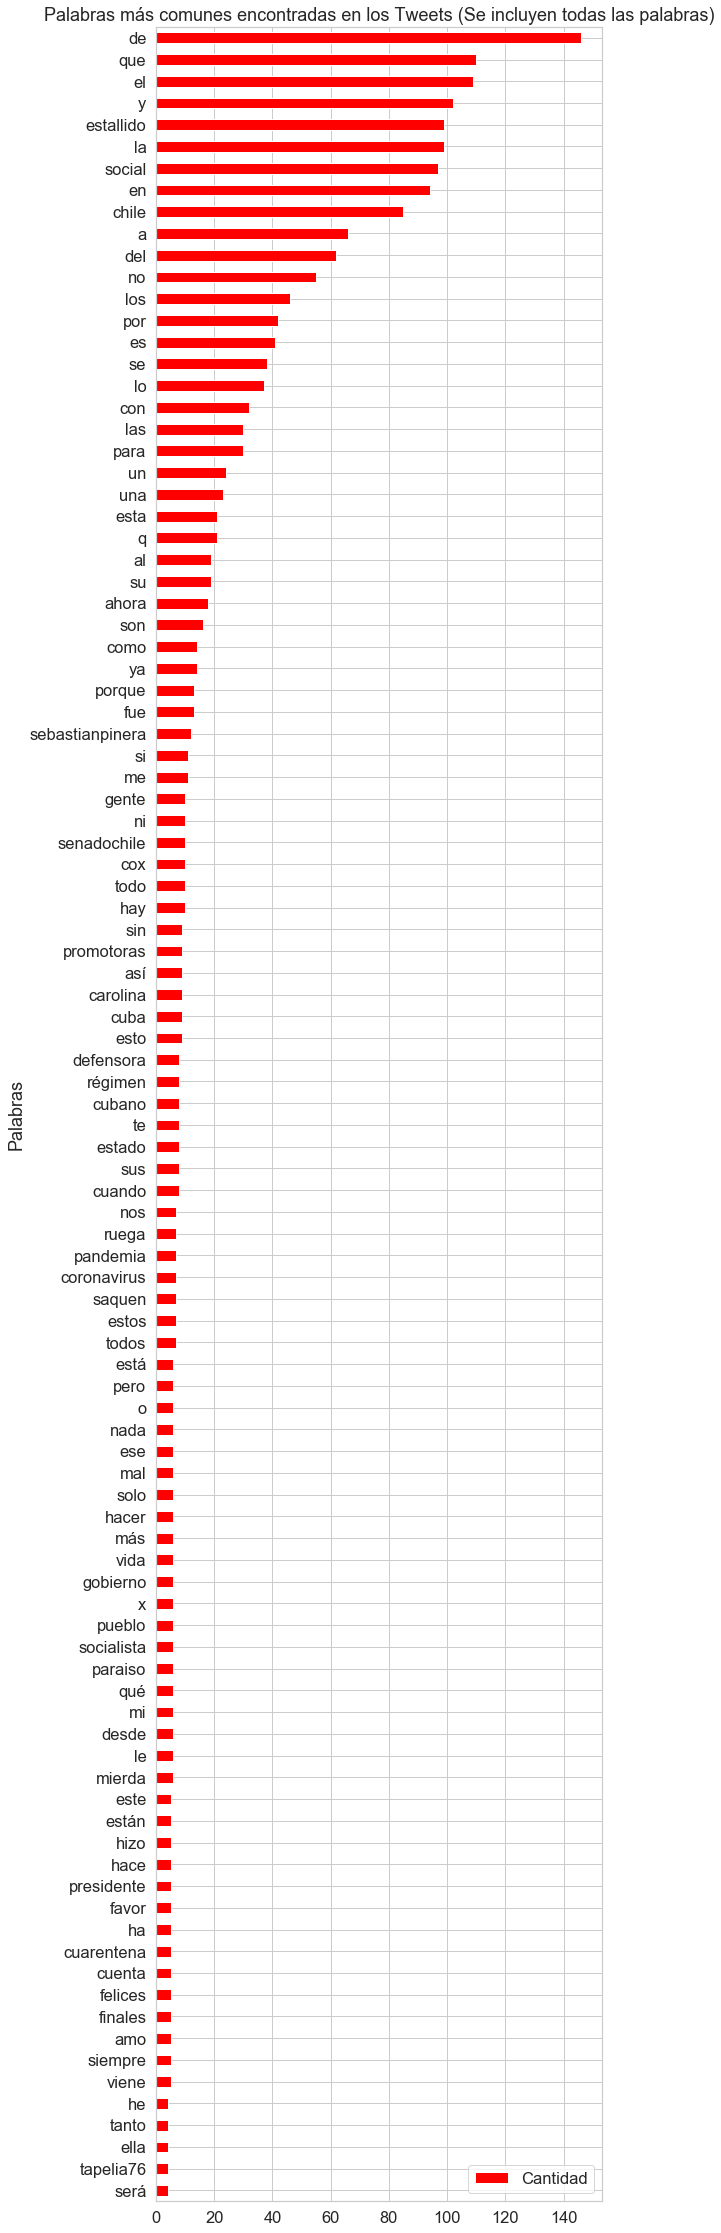

In [211]:
fig, ax = plt.subplots(figsize=(8, 40))
# Trazamos un gráfico de barras horizontales:
clean_tweets_no_urls.sort_values(by='Cantidad').plot.barh(x='Palabras',
                      y='Cantidad',
                      ax=ax,
                      color="red")
ax.set_title("Palabras más comunes encontradas en los Tweets (Se incluyen todas las palabras)")
plt.show()

#### Eliminando palabras vacías (Stopwords) con **nltk**.

Existen palabras que no agregan información significativa al texto que analizamos. Tal es el caso de los artículos, los verbos ser o estar y los adverbios. 

El paquete Python **nltk**, proporciona una lista de **Stopwords** que puedes usar para limpiar los datos de Twitter.

Lo interesante es que puede ser descargado para varios idiomas, incluyendo el español.

In [213]:
# Descargemos el paquete stopwords de **nltk**:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
stop_words = set(stopwords.words('spanish'))
# Vemos algunas palabras del conjunto y nos percatamos 
# de que son menos de mil palabras:
list(stop_words)[0:1000]

['tenga',
 'tanto',
 'nuestro',
 'tengamos',
 'he',
 'tendrás',
 'habríais',
 'habíamos',
 'tuvo',
 'ellos',
 'hubiera',
 'has',
 'ni',
 'ha',
 'porque',
 'le',
 'esté',
 'algunas',
 'estaba',
 'tuviese',
 'entre',
 'mis',
 'estando',
 'nuestra',
 'son',
 'seríais',
 'el',
 'hubieras',
 'al',
 'tendrán',
 'fuesen',
 'fuiste',
 'estoy',
 'tiene',
 'tienen',
 'fue',
 'está',
 'estaríamos',
 'estabais',
 'tendría',
 'tenida',
 'tuya',
 'tú',
 'estuvieran',
 'estado',
 'sea',
 'esas',
 'tuviste',
 'seamos',
 'erais',
 'tuyas',
 'fui',
 'habidos',
 'tendríais',
 'habrías',
 'hubo',
 'desde',
 'cual',
 'estuve',
 'tuvieran',
 'estuvieses',
 'todo',
 'más',
 'muy',
 'vuestra',
 'sentidas',
 'que',
 'habidas',
 'yo',
 'las',
 'para',
 'serán',
 'sí',
 'mío',
 'tenidos',
 'serían',
 'tengáis',
 'vuestro',
 'estuvierais',
 'estéis',
 'estábamos',
 'hubieseis',
 'estuviésemos',
 'tuviésemos',
 'os',
 'otras',
 'esa',
 'tuyos',
 'estuvo',
 'estados',
 'nosotras',
 'sobre',
 'habré',
 'suyos',
 'te

In [216]:
# Veamos las palabras que tenemos en nuestro primer tweet:
words_in_tweet[0]

['tapelia76',
 'esta',
 'plasta',
 'de',
 'mierda',
 'estaría',
 'en',
 'adoctrinamiento',
 'en',
 'esa',
 'isla',
 'q',
 'casualidad',
 'estallido',
 'social',
 'en',
 'chile',
 'y',
 'precisamente',
 'viaje',
 'a',
 'su',
 'defendido',
 'régimen',
 'q',
 'le',
 'salga',
 'gonorrea',
 'en',
 'los',
 'ojos']

In [219]:
# Eliminemos las stopwords en la lista de palabras de los tweets
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
# revisemos el primer tweet limpio de 'palabras vacías':
tweets_nsw[0]

['tapelia76',
 'plasta',
 'mierda',
 'adoctrinamiento',
 'isla',
 'q',
 'casualidad',
 'estallido',
 'social',
 'chile',
 'precisamente',
 'viaje',
 'defendido',
 'régimen',
 'q',
 'salga',
 'gonorrea',
 'ojos']

Una vez más, podemos limpiar nuestra lista y crear un contador para devolver las 100 palabras más utilizadas y la cantidad de veces que se usan.

In [220]:
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(100)

[('estallido', 99),
 ('social', 97),
 ('chile', 85),
 ('q', 21),
 ('ahora', 18),
 ('sebastianpinera', 12),
 ('si', 11),
 ('cox', 10),
 ('gente', 10),
 ('senadochile', 10),
 ('promotoras', 9),
 ('así', 9),
 ('carolina', 9),
 ('cuba', 9),
 ('régimen', 8),
 ('defensora', 8),
 ('cubano', 8),
 ('ruega', 7),
 ('pandemia', 7),
 ('coronavirus', 7),
 ('saquen', 7),
 ('mierda', 6),
 ('paraiso', 6),
 ('socialista', 6),
 ('pueblo', 6),
 ('x', 6),
 ('vida', 6),
 ('gobierno', 6),
 ('mal', 6),
 ('solo', 6),
 ('hacer', 6),
 ('viene', 5),
 ('siempre', 5),
 ('cuarentena', 5),
 ('amo', 5),
 ('finales', 5),
 ('felices', 5),
 ('cuenta', 5),
 ('favor', 5),
 ('presidente', 5),
 ('hace', 5),
 ('hizo', 5),
 ('tapelia76', 4),
 ('culpa', 4),
 ('uds', 4),
 ('trabajo', 4),
 ('camaracl', 4),
 ('mismo', 4),
 ('meses', 4),
 ('nunca', 4),
 ('gran', 4),
 ('años', 4),
 ('destrucción', 4),
 ('virus', 4),
 ('comunismo', 4),
 ('congreso', 4),
 ('octubre', 3),
 ('total', 3),
 ('pase', 3),
 ('20', 3),
 ('cómo', 3),
 ('weones

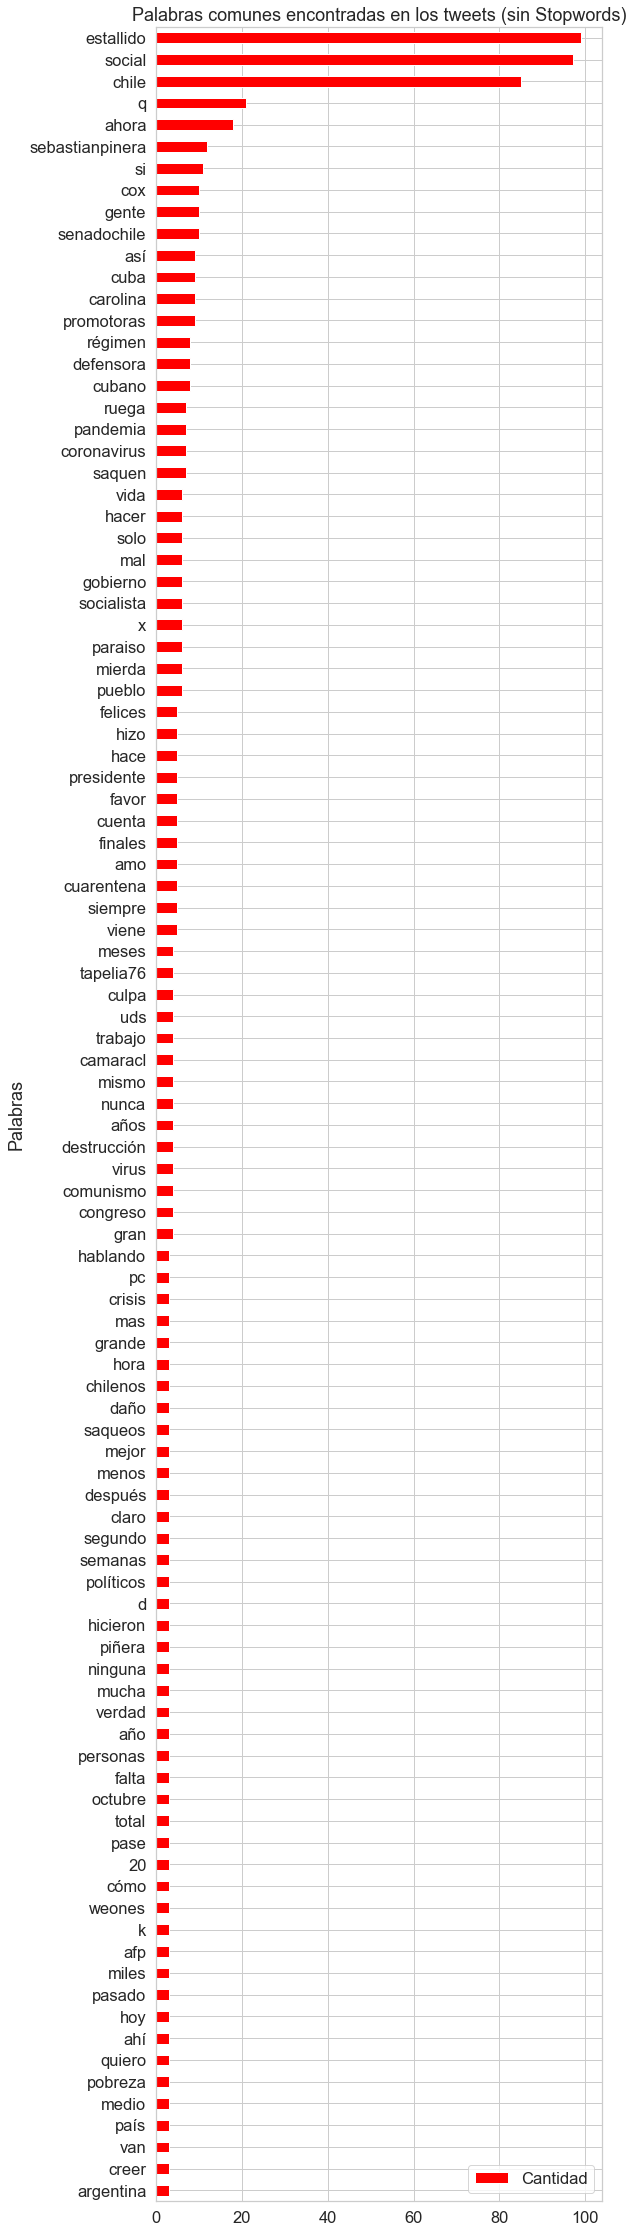

In [221]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(100),
                             columns=['Palabras', 'Cantidad'])
fig, ax = plt.subplots(figsize=(8, 40))
# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='Cantidad').plot.barh(x='Palabras',
                      y='Cantidad',
                      ax=ax,
                      color="red")
ax.set_title('Palabras comunes encontradas en los tweets (sin Stopwords)')
plt.show()

# Este gráfico muestra la frecuencia de las palabras en 
# los tweets sobre estallido-social-Chile, después de que se hayan 
# eliminado las URL y las stopwords.

#### Eliminando las palabras de recopilación.

Además de eliminar palabras vacías, es común también eliminar palabras de recopilación, las cuales son las palabras que usamos para 'estallido social Chile' como término de recopilación. Por lo tanto, podemos esperar que estos términos se encuentren en cada tweet. Esto podría sesgar nuestro análisis de frecuencia de palabras.

A continuación, las eliminamos:

In [222]:
collection_words = ['estallido', 'social', 'chile']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

Comparamos las palabras en el primer tweet con y sin las palabras de recopilación:

In [223]:
tweets_nsw[0]

['tapelia76',
 'plasta',
 'mierda',
 'adoctrinamiento',
 'isla',
 'q',
 'casualidad',
 'estallido',
 'social',
 'chile',
 'precisamente',
 'viaje',
 'defendido',
 'régimen',
 'q',
 'salga',
 'gonorrea',
 'ojos']

In [224]:
tweets_nsw_nc[0]

['tapelia76',
 'plasta',
 'mierda',
 'adoctrinamiento',
 'isla',
 'q',
 'casualidad',
 'precisamente',
 'viaje',
 'defendido',
 'régimen',
 'q',
 'salga',
 'gonorrea',
 'ojos']

#### Cálculo y dibujo de la frecuencia de palabras de los Tweets limpios.

Ahora que hemos limpiado nuestros datos, estamos listos para calcular y trazar los resultados finales de frecuencia de palabras.

In [226]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))
# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
counts_nsw_nc.most_common(30)

[('q', 21),
 ('ahora', 18),
 ('sebastianpinera', 12),
 ('si', 11),
 ('cox', 10),
 ('gente', 10),
 ('senadochile', 10),
 ('promotoras', 9),
 ('así', 9),
 ('carolina', 9),
 ('cuba', 9),
 ('régimen', 8),
 ('defensora', 8),
 ('cubano', 8),
 ('ruega', 7),
 ('pandemia', 7),
 ('coronavirus', 7),
 ('saquen', 7),
 ('mierda', 6),
 ('paraiso', 6),
 ('socialista', 6),
 ('pueblo', 6),
 ('x', 6),
 ('vida', 6),
 ('gobierno', 6),
 ('mal', 6),
 ('solo', 6),
 ('hacer', 6),
 ('viene', 5),
 ('siempre', 5)]

Para averiguar la cantidad de palabras únicas en todos los tweets, puede tomar el len () del recuento de objetos que acaba de crear.

In [227]:
len(counts_nsw_nc)

1305

Por último, puede crear el marco de datos de Pandas de las palabras y sus recuentos y trazar las 15 palabras más comunes de los tweets limpios (es decir, sin URL, palabras de detención o palabras de colección).

In [228]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['Palabras', 'Cantidad'])
clean_tweets_ncw.head(100)

,Palabras,Cantidad
0,q,21
1,ahora,18
2,sebastianpinera,12
3,si,11
4,cox,10
...,...,...
95,hablando,3
96,argentina,3
97,tan,3
98,peor,3


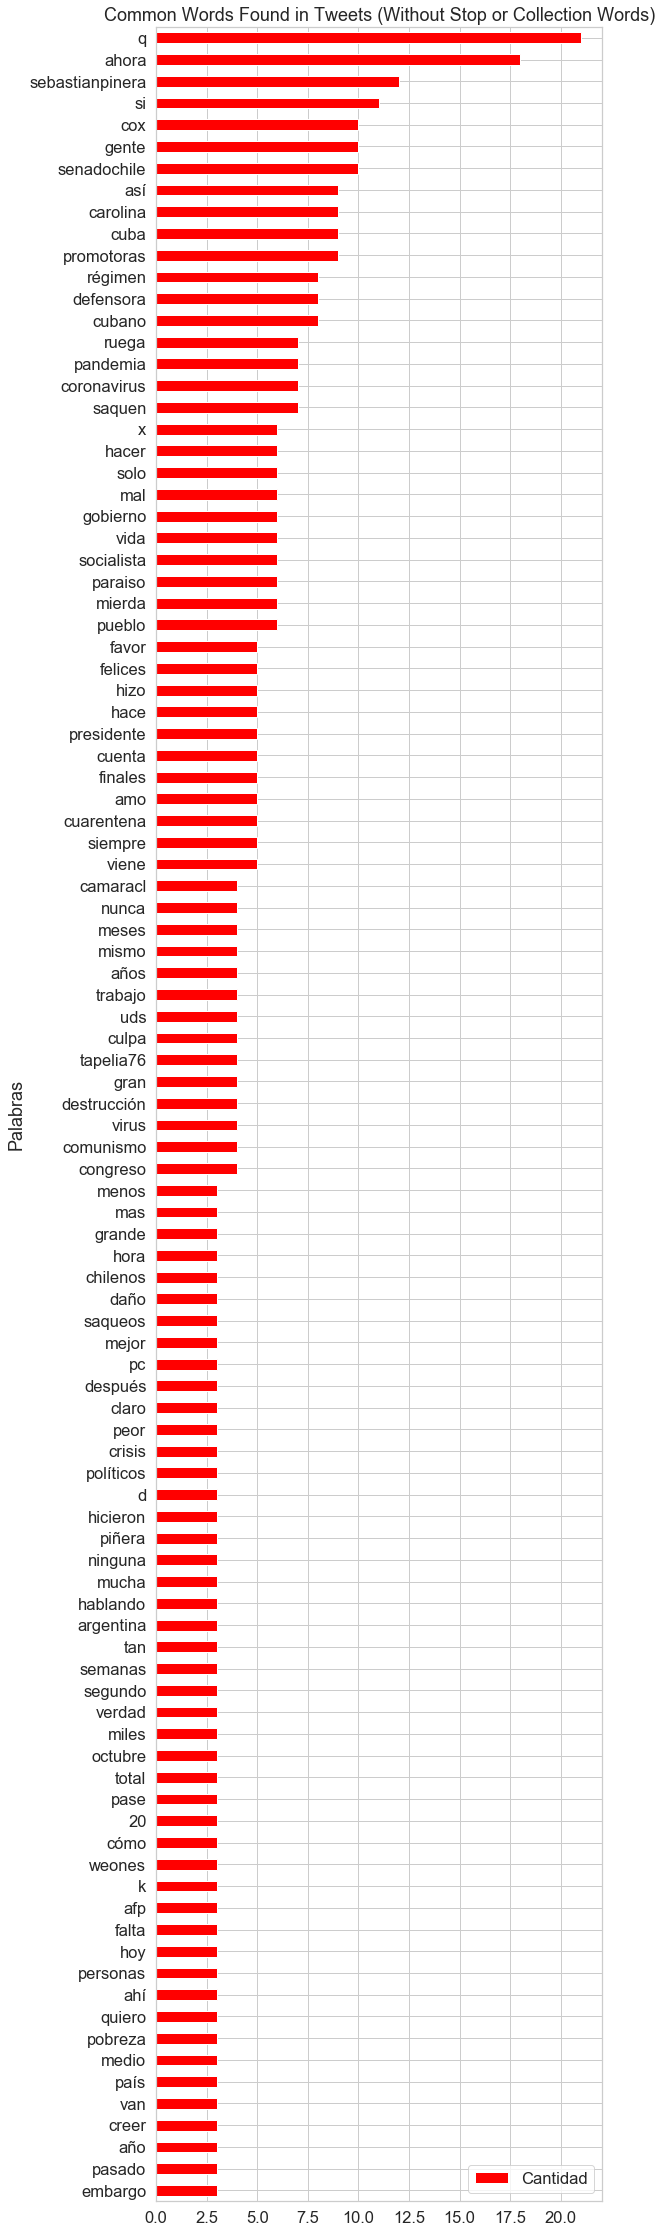

In [229]:
fig, ax = plt.subplots(figsize=(8, 40))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='Cantidad').plot.barh(x='Palabras',
                      y='Cantidad',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()
# Este gráfico muestra la frecuencia de todas las palabras
# en los tweets sobre el cambio climático, después de que 
# se hayan eliminado las URL, las palabras de detención y 
# las palabras de recopilación.

## 2. Exploración de palabras concurrentes (bigramas) en Tweets.

Los **Bigramas** (un caso especial del N-grama) son grupos de dos letras, dos sílabas, o dos palabras, utilizados comúnmente como base para el  análisis estadístico simple de texto. Se utilizan en uno de los más exitosos modelos de lenguaje para el reconocimiento de voz.

Los Bigramas ayudan a proporcionar la probabilidad condicional de una palabra dada la palabra precedente, cuando la relación de la probabilidad condicional se aplica:

$$ P(\displaystyle{W_n}| \displaystyle{W_{n-1}}) =\frac{P(\displaystyle{W_{n-1}}, \displaystyle{W_{n}}) }{ P(\displaystyle{W_{n-1}}) } $$

Es decir, la probabilidad $P( )$ de una palabra $W_n$ dada la palabra precedente $W_{n−1}$ es igual a la probabilidad de su bigrama, o la co-ocurrencia de las dos palabras $P(W_{n−1},W_n)$, dividida por la probabilidad de la palabra precedente.

#### Probabilidad condicional.

Es la probabilidad de que ocurra un evento A, sabiendo que también sucede otro evento B. La probabilidad condicional se escribe $P(A|B)$, y se lee «la probabilidad de A dado B.

No tiene por qué haber una relación causal o temporal entre A y B. A puede preceder en el tiempo a B, sucederlo o pueden ocurrir simultáneamente. A puede causar B, viceversa o pueden no tener relación causal. Las relaciones causales o temporales son nociones que no pertenecen al ámbito de la probabilidad. Pueden desempeñar un papel o no dependiendo de la interpretación que se le dé a los eventos.

Para identificar la coincidencia de palabras en los tweets, puede usar bigramas de nltk.
Comience con una comprensión de la lista para crear una lista de todos los bigrams (es decir, palabras concurrentes) en los tweets.

In [230]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]
# View bigrams for the first tweet
terms_bigram[0]

[('tapelia76', 'plasta'),
 ('plasta', 'mierda'),
 ('mierda', 'adoctrinamiento'),
 ('adoctrinamiento', 'isla'),
 ('isla', 'q'),
 ('q', 'casualidad'),
 ('casualidad', 'precisamente'),
 ('precisamente', 'viaje'),
 ('viaje', 'defendido'),
 ('defendido', 'régimen'),
 ('régimen', 'q'),
 ('q', 'salga'),
 ('salga', 'gonorrea'),
 ('gonorrea', 'ojos')]

Observe que las palabras están emparejadas por co-ocurrencia. Puede recordar el tweet original o la lista limpia de palabras para ver cómo se identifica la co-ocurrencia.

In [232]:
# Original tweet without URLs
all_tweets_no_urls[0]

'tapelia76 Esta plasta de mierda estaría en adoctrinamiento en esa isla Q casualidad estallido social en Chile y precisamente viaje a su defendido régimen Q le salga gonorrea en los ojos'

In [233]:
# Clean tweet 
tweets_nsw_nc[0]

['tapelia76',
 'plasta',
 'mierda',
 'adoctrinamiento',
 'isla',
 'q',
 'casualidad',
 'precisamente',
 'viaje',
 'defendido',
 'régimen',
 'q',
 'salga',
 'gonorrea',
 'ojos']

Similar a lo que aprendió en la lección anterior sobre conteos de frecuencia de palabras, puede usar un contador para capturar las bigramas como teclas de diccionario y sus conteos son como valores de diccionario.

Comience por aplanar la lista de bigrams. Luego puede crear el contador y consultar los 20 bigrams más comunes en los tweets.

In [234]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)


[(('cox', 'promotoras'), 9),
 (('promotoras', 'defensora'), 8),
 (('carolina', 'cox'), 8),
 (('defensora', 'régimen'), 6),
 (('régimen', 'cubano'), 6),
 (('ahora', 'ruega'), 6),
 (('saquen', 'paraiso'), 6),
 (('paraiso', 'socialista'), 6),
 (('amo', 'finales'), 5),
 (('finales', 'felices'), 5),
 (('felices', 'carolina'), 5),
 (('cubano', 'ahora'), 5),
 (('ruega', 'saquen'), 5),
 (('socialista', 'así'), 4),
 (('cuarentena', 'total'), 3),
 (('defensora', 'ultranza'), 2),
 (('cubano', 'quedó'), 2),
 (('18', 'octubre'), 2),
 (('sebastianpinera', 'presidente'), 2),
 (('piensa', 'q'), 2)]

Once again, you can create a Pandas Dataframe from the counter.

In [235]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df


,bigram,count
0,"(cox, promotoras)",9
1,"(promotoras, defensora)",8
2,"(carolina, cox)",8
3,"(defensora, régimen)",6
4,"(régimen, cubano)",6
5,"(ahora, ruega)",6
6,"(saquen, paraiso)",6
7,"(paraiso, socialista)",6
8,"(amo, finales)",5
9,"(finales, felices)",5


Visualize Networks of Bigrams

You can now use this Pandas Dataframe to visualize the top 20 occurring bigrams as networks using the Python package NetworkX.

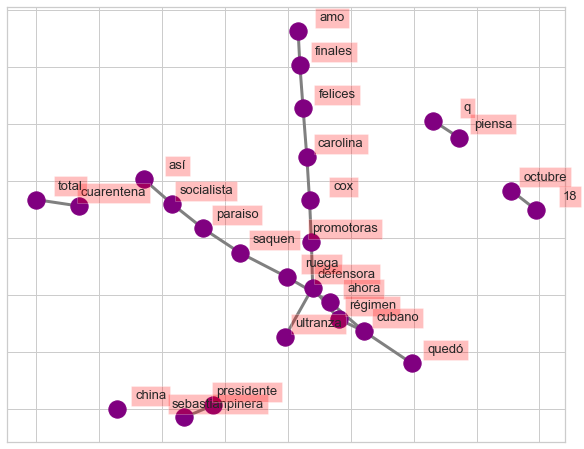

In [236]:
# Create dictionary of bigrams and their counts
import networkx as nx

d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()
# Este gráfico muestra las redes de palabras concurrentes en tuits sobre estallido social chile:



## 3. Análisis de sentimientos en tweets
### 3.0 Introducción
¿Qué es el análisis de sentimientos de Twitter?

Es, en términos muy simples, el proceso de analizar los Tweets de las personas sobre un tema específico para comprender cómo se sienten al respecto.

¿Como funciona?

Twitter Sentiment Analysis (TSA) es parte de NLP (procesamiento del lenguaje natural). Utiliza la minería de datos para desarrollar conclusiones para su uso posterior. 

Implica:

1. Hacer scraping sobre Twitter para recopilar Tweets relevantes como nuestros datos.
2. Limpiar estos datos.
3. Encontrar la polaridad de cada uno de estos Tweets.
4. Calcular el número de sentimientos positivos, negativos y neutrales.
5. Obtener una conclusión sobre este análisis.

El cnocimiento de los sentimientos de las personas sobre un tema en particular puede beneficiar a los siguientes sectores:

1. Política: podemos usar la TSA para determinar la posición política y las opiniones de la mayoría de los ciudadanos de un país, y predecir el posible resultado de una próxima elección. En conseuencia, os candidatos y los partidos pueden usar esta información para planificar sus campañas.
2. Negocios: las empresas pueden usar TSA para hacer crecer su negocio, entendiendo lo que las personas sienten sobre sus productos, servicios, campañas publicitarias y nuevas ideas. En consecuencia, pueden planificar sus estrategias y mejorar sus productos según las necesidades de las personas.
3. Situaciones sociales: muchas personas responden o reaccionan a situaciones sociales a través de Twitter, y el uso de TSA en estos Tweets puede ayudarnos a comprender la gravedad de ciertas situaciones. Por ejemplo, cuando ocurre una inundación devastadora en un país, la noticia comienza a ser tendencia, y esto inicia la acción pública y alienta a las personas a contribuir a su manera para ayudar a las personas necesitadas.

### 3.1 TSA con Histogramas

El análisis de sentimientos es un método para identificar actitudes en los datos de texto sobre un tema en particular. Se puntúa utilizando valores de polaridad que oscilan entre 1 y -1. Los valores más cercanos a 1 indican más positividad, mientras que los valores más cercanos a -1 más negatividad.

Aplicaremos un análisis de sentimientos a los datos de Twitter utilizando el paquete Python **textblob**.

Calcularermos un valor de polaridad para cada tweet sobre un tema determinado y luego trazaremos estos valores en un histograma para identificar el sentimiento general hacia él.

### 1. Obtengamos y limpiemos los tweets relacionados con el término coronavirus en español.

In [240]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [241]:
consumer_key='koO4XqTuWFr5ADGcE8kjIkVoU'
consumer_secret='3F4sk9qU8zbKBROuLPUUj1uvE2YuhseXPe0ahMQoivg4icN5bL'
access_token='1230251564616515586-2KqPsCG2mIJp3irRjENgHpCfQUxTUg'
access_token_secret='6PJfMtYGY7w6csiIX9m1S5jFEKNZ3hE9PVkHKeN1S14iM'    
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [242]:
# Tomaremos y limpiemos 1000 tweets recientes. 
def remove_url(txt):
    return ' '.join(re.sub('([^0-9A-Za-z-áéíóúÁÉÍÓÚñÑ \t])|(\w+:\/\/\S+)', '', txt).split())
# Create a custom search term and define the number of tweets
search_term = "#coronavirus -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2020-03-01').items(100)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


Podemos usar el paquete de Python textblob para calcular los valores de polaridad de los tweets individuales sobre el cambio climático.

Comenzamos creando objetos textblob, que asignan valores de polaridad a los tweets. Podemos identificar el valor de polaridad utilizando el atributo .polarity del objeto texblob.

In [243]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("coronavirus Lejos de mejorar la cosa se pone mas complicada en muchos países En USA se suman los estados que d"))

Podemos crear una lista de valores de polaridad y texto para cada tweet, y luego crear un dataframe de Pandas a partir de la lista.

In [244]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[0]

[0.0,
 'coronavirus Lejos de mejorar la cosa se pone mas complicada en muchos países En USA se suman los estados que d']

In [245]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head(30)

,polarity,tweet
0,0.0,coronavirus Lejos de mejorar la cosa se pone m...
1,0.0,PrevenciónYAcción El Presidente de la Repúblic...
2,0.0,No sienten que viven en una especie de ruleta ...
3,0.0,Ante crisis por coronavirus Banca Afirme dejar...
4,0.0,Son seguras las entregas de alimentos y comest...
5,0.0,30Mar Coronavirus Venezuela 700pm Nicolás Madu...
6,0.0,Coronavirus OMS espera que España e Italia alc...
7,0.0,Los juzgados siguen prestando servicio sin con...
8,0.0,Mollema tras dos semanas enfermo Espero que ha...
9,0.0,Se descubrió la cara del virusfuerapiñera coro...


Estos valores de polaridad se pueden trazar en un histograma, lo que puede ayudar a **resaltar el sentimiento general** (es decir, más positividad o negatividad) hacia el tema en estudio.

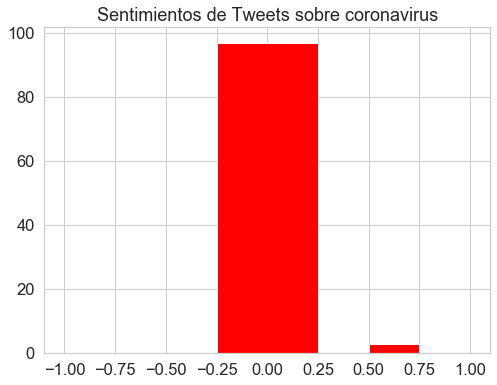

In [246]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")
plt.title("Sentimientos de Tweets sobre coronavirus")
plt.show()


Para obtener una mejor visualización de los valores de polaridad, puede ser útil eliminar los valores de polaridad iguales a cero y crear una ruptura en el histograma en cero.

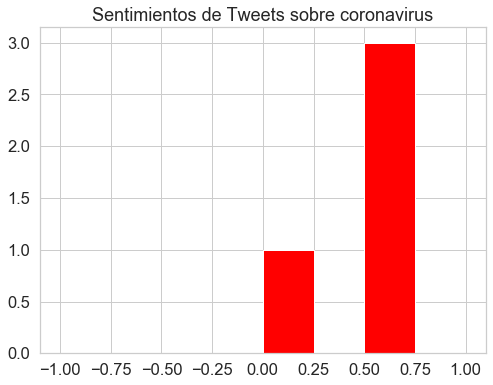

In [247]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Sentimientos de Tweets sobre coronavirus")
plt.show()


Este gráfico muestra un histograma revisado de valores de polaridad para tweets sobre el cambio climático. Para este histograma, se han eliminado los valores de polaridad igual a cero, y se ha agregado un corte en cero, para resaltar mejor la distribución de los valores de polaridad.
¿Qué le dice el histograma de los valores de polaridad sobre los sentimientos en los tweets recopilados de la búsqueda "# clima + cambio-filtro: retweets"? ¿Son más positivos o negativos?

### 2. Obtengamos y limpiemos los tweets relacionados con el término estallido+social en Chile.

Comienzamos buscando los tweets y combinando la limpieza de los datos (es decir, eliminando las URL) con la creación de los objetos textblob.

In [248]:
search_term = "estallido+social+chile -filter:retweets"
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2019-10-18').items(100)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]
all_tweets_no_urls[:5]

[TextBlob("esto lo antes posible y migremos YA MISMO a un sistema como el de Corea del Sur y Chile en los cuales no se estran"),
 TextBlob("EsPublicoCL ciper Chile es el segundo país a nivel mundial que ha gastado para combatir el virusY de no haber t"),
 TextBlob("En el sur de Italia comienza a desatarse una especie de estallido social por las externalidades de la crisis sanita"),
 TextBlob("LanatoForeverInforme periodístico independiente del caso estallido social en Chile"),
 TextBlob("Saqueos en Italia y Argentina pronto ocurrirá lo mismo en Chile y se va a usar para reiniciar el estallido social")]

Luego, podemos crear el dataframe de Pandas de los valores de polaridad y trazar el histograma para los tweets de Estallido Social.

In [249]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()


,polarity,tweet
2,0.033333,En el sur de Italia comienza a desatarse una e...
3,0.033333,LanatoForeverInforme periodístico independient...
4,0.033333,Saqueos en Italia y Argentina pronto ocurrirá ...
6,0.033333,tapelia76 Esta plasta de mierda estaría en ado...
7,0.033333,OIPOL CUBACarolina Cox sería una de las promot...


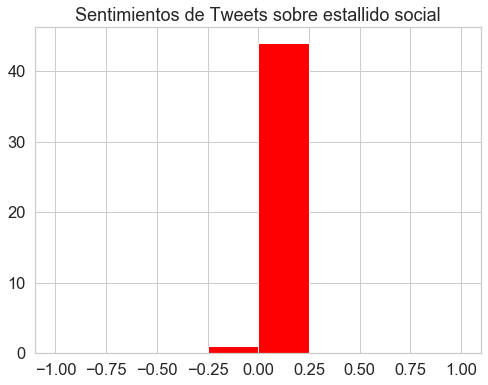

In [250]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="red")

plt.title("Sentimientos de Tweets sobre estallido social")
plt.show()


Este gráfico muestra un histograma de valores de polaridad para tweets sobre estalido social en Chile. Para este histograma, se han eliminado los valores de polaridad iguales a cero y se ha agregado un corte en cero, para resaltar mejor la distribución de los valores de polaridad.

Según este histograma, ¿diría que los sentimientos de los tweets sobre estallido social en Chile son más positivos o negativos?

### 3.2 TSA con Gráficos de torta.

In [251]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [252]:
def remove_url(txt):
    return ' '.join(re.sub('([^0-9A-Za-z-áéíóúÁÉÍÓÚñÑ \t])|(\w+:\/\/\S+)', '', txt).split())

In [253]:
word = input("Enter the word here: ")

Enter the word here: coronavirus


In [254]:
filtered='word -filter:retweets'
tweets = tweepy.Cursor(api.search,
              q=filtered,
              lang="es").items(100)
tweets

In [255]:
cleantweets = [remove_url(tweet.text) for tweet in tweets]

In [256]:
sentiment_objects = [TextBlob(tweet) for tweet in cleantweets]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("Cada vez que prendo mi computadora y abro el Word"))

In [257]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

sentiment_values[0:99]

[[0.0, 'Cada vez que prendo mi computadora y abro el Word'],
 [0.0,
  'google no me deja entrar a word y tengo que terminar un trabajo q hago me mato'],
 [0.0,
  'CÓMO QUE HUENING KAI TENÍA QUE DARLE UN BESITO A TAEHYUN COMO MISIÓN DE TO DO VOY A HACER LA M WORD PUDE TENER CONTENIDO TYUNNING Y MORIR'],
 [0.0,
  'Saben que he hecho 1 Organice la despensa 2 Pase como 15 recetas a la PC en word3 Empece a organizar el c'],
 [0.0, 'Valentina bien bruta para lo que tenga que ver word y Excel'],
 [0.0,
  'CamiluBravo Yo acabo de leer que tenés que transcribirlo y enviarlo sobre que me costó un huevo hacerlo en word'],
 [0.0,
  'no puedo ser tan trola me puse a llorar viendo este video me voy a m word'],
 [0.0,
  'CompañiatvmasTampoco tengo tinta lo que hice el Pdf lo pasé a word y así lo hace en el compu'],
 [0.0, 'Estoy haciendo los tp desde el word del celular chau vista'],
 [0.0,
  'hay una chica fan de rosi que siempre que defiendo a aitana con spoiler me viene diciendo que si las cancion

In [258]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.0,Cada vez que prendo mi computadora y abro el Word
1,0.0,google no me deja entrar a word y tengo que te...
2,0.0,CÓMO QUE HUENING KAI TENÍA QUE DARLE UN BESITO...
3,0.0,Saben que he hecho 1 Organice la despensa 2 Pa...
4,0.0,Valentina bien bruta para lo que tenga que ver...
...,...,...
95,0.0,alguien que normalmente haga trabajo es word m...
96,0.0,Esto de estar todo el tiempo al frente de la c...
97,0.0,mmm si pudiera decirle q se vaya a la v word l...
98,0.0,Prendo mi computadora y automáticamente se abr...


In [259]:
n=sentiment_df["polarity"]

m=pd.Series(n)

m

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: polarity, Length: 100, dtype: float64

In [260]:
pos=0
neg=0
neu=0

In [261]:
for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
3 1 96


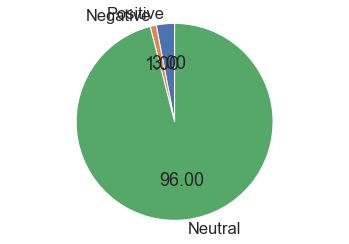

In [262]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [263]:
print("%f percent twitter users feel positive about %s"%(pos,word))

print("%f percent twitter users feel negative about %s"%(neg,word))

print("%f percent twitter users feel neutral about %s"%(neu,word))

3.000000 percent twitter users feel positive about coronavirus
1.000000 percent twitter users feel negative about coronavirus
96.000000 percent twitter users feel neutral about coronavirus


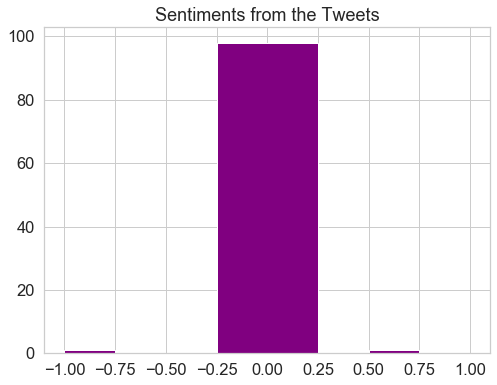

In [264]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from the Tweets")
plt.show()

#### Nube de palabras:

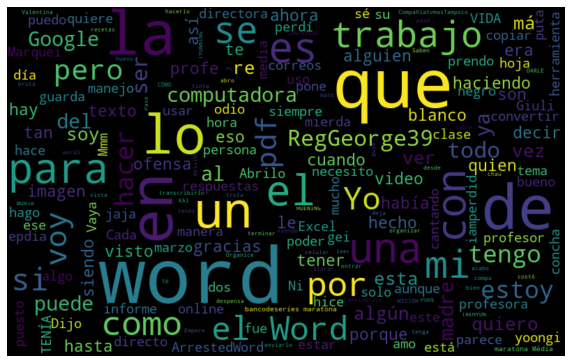

In [265]:
all_words = ' '.join([text for text in cleantweets])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3.3 TSA: Estadísticas y series de tiempo de un usuario tweeter en particular.



https://rodolfoferro.wordpress.com/2017/09/12/sentiment-analysis-on-trumps-tweets-using-python/

Exraeremos datos de Twitter usando tweepy y los manipularemos usando pandas, luego aplicaremos algunas estadísticas y visualizaciones básicas con numpy, matplotlib y seaborn.
Por último realizaremos un análisis de sentimientos de los tweets extraídos de un usuario cualquiera usando textblob.

In [266]:
# Importemos nuestra librerías:
import tweepy # Para consumir la API Twitter
import pandas as pd # Para manipular la data
import numpy as np # Para hacer cálculos con números
 
# Para dibujar y visualizar:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
extractor = tweepy.API(auth)
usuario = input('Ingrese usuario de twitter a estudiar: ')
# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name=usuario, count=200)
print("Número de tweet extraídos: {}.\n".format(len(tweets)))
 
# We print the most recent 5 tweets:
print("Los 5 más recientes tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Ingrese usuario de twitter a estudiar: danieljadue
Número de tweet extraídos: 200.

Los 5 más recientes tweets:

RT @Muni_Recoleta: Recuerda estas recomendaciones si tienes que ir a las ferias libres de la comuna.
Es importante tenerlas en cuenta para…

Hoy el acceso a herramientas que aporten al fortalecimiento de nuestras comunidades es fundamental. Este miércoles… https://t.co/09XhN9Pdth

@Optimis03757984 @TREMENDAFACHA @PCdeChile @sebastianpinera se dialoga cuando hay dos dispuestos a hacerlo.  Aca no… https://t.co/nalhInGDOy

@TREMENDAFACHA @PCdeChile @sebastianpinera revise y compare las cifras y luego me cuenta

Comparto: Derechos de los trabajadores en tiempos de Pandemia  https://t.co/R4rH0gz10P



In [268]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets
0,RT @Muni_Recoleta: Recuerda estas recomendacio...
1,Hoy el acceso a herramientas que aporten al fo...
2,@Optimis03757984 @TREMENDAFACHA @PCdeChile @se...
3,@TREMENDAFACHA @PCdeChile @sebastianpinera rev...
4,Comparto: Derechos de los trabajadores en tiem...
5,Caso primera línea: ilegalidad en tiempos de c...
6,RT @ghidalgoa: no olvido\nNo perdono\nNo me re...
7,Los partidarios del modelo siempre justifican ...
8,No cree usted señor @sebastianpinera que se le...
9,@JsvergaraS No se puede guardar silencio ante ...


Ahora tenemos un extractor y datos extraídos, que se enumeran en la variable tweets. Cada elemento en esa lista es un objeto tweet de Tweepy. Aprenderemos cómo manejar estos datos en la siguiente subsección.

### Creemos un DataFrame (pandas)

Ahora tenemos información inicial para construir un DataFrame de pandas, con el fin de manipular la información de una manera muy fácil.
La función de visualización de IPython traza una salida de manera amigable, y el método head de un marco de datos nos permite visualizar los primeros 5 elementos del marco de datos (o el primer número de elementos que se pasan como argumento).
Entonces, usando la comprensión de la lista de Python:

In [269]:
# Creamos un marco de datos de pandas de la siguiente manera:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Mostramos los primeros 10 elementos del marco de datos:
display(data.head(10))

,Tweets
0,RT @Muni_Recoleta: Recuerda estas recomendacio...
1,Hoy el acceso a herramientas que aporten al fo...
2,@Optimis03757984 @TREMENDAFACHA @PCdeChile @se...
3,@TREMENDAFACHA @PCdeChile @sebastianpinera rev...
4,Comparto: Derechos de los trabajadores en tiem...
5,Caso primera línea: ilegalidad en tiempos de c...
6,RT @ghidalgoa: no olvido\nNo perdono\nNo me re...
7,Los partidarios del modelo siempre justifican ...
8,No cree usted señor @sebastianpinera que se le...
9,@JsvergaraS No se puede guardar silencio ante ...


Así que ahora tenemos una buena tabla con datos ordenados.

Una cosa interesante es el número de métodos internos que tiene la estructura de tweet en Tweepy:

In [171]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


La parte interesante de aquí es la cantidad de metadatos contenidos en un solo tweet. Si queremos obtener datos como la fecha de creación o la fuente desde la que fue creada un tweet (por ejemplo desde un iphone), podemos acceder a la información con estos atributos. Un ejemplo es el siguiente:

In [270]:
# Imprimimos información del primer tweet:
print('Identificación del tweet: '+str(tweets[0].id))
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

Identificación del tweet: 1244727857244504067
2020-03-30 20:47:01
Twitter for iPhone
0
18
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Muni_Recoleta', 'name': 'Municipio Recoleta', 'id': 1037464255, 'id_str': '1037464255', 'indices': [3, 17]}], 'urls': []}


Ahora podemos ordenar los datos relevantes y agregarlos a nuestro DataFrame.

#### Agregar información relevante a nuestro DataFrame

Como podemos ver, podemos obtener muchos datos de un solo tweet. Pero no todos estos datos siempre son útiles para cosas específicas. En nuestro caso, simplemente agregamos algunos datos a nuestro marco de datos. Para esto, utilizaremos la comprensión de la lista de Pythons y se agregará una nueva columna al marco de datos simplemente agregando el nombre del contenido entre corchetes y asignando el contenido. 

In [271]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

Y para mostrar nuevamente el marco de datos para ver los cambios que acabamos de ...:

In [272]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @Muni_Recoleta: Recuerda estas recomendacio...,139,1244727857244504067,2020-03-30 20:47:01,Twitter for iPhone,0,18
1,Hoy el acceso a herramientas que aporten al fo...,139,1244714703860924417,2020-03-30 19:54:45,Twitter for iPhone,193,74
2,@Optimis03757984 @TREMENDAFACHA @PCdeChile @se...,140,1244661691956244481,2020-03-30 16:24:06,Twitter Web App,22,0
3,@TREMENDAFACHA @PCdeChile @sebastianpinera rev...,88,1244645076103553025,2020-03-30 15:18:05,Twitter Web App,708,28
4,Comparto: Derechos de los trabajadores en tiem...,86,1244644194997751808,2020-03-30 15:14:35,Twitter for iPhone,198,186
5,Caso primera línea: ilegalidad en tiempos de c...,75,1244618851901456386,2020-03-30 13:33:52,Twitter for iPhone,345,218
6,RT @ghidalgoa: no olvido\nNo perdono\nNo me re...,140,1244349973908553728,2020-03-29 19:45:27,Twitter Web App,0,179
7,Los partidarios del modelo siempre justifican ...,140,1244004564761788416,2020-03-28 20:52:55,Twitter for iPhone,1495,1271
8,No cree usted señor @sebastianpinera que se le...,140,1243938989972885505,2020-03-28 16:32:21,Twitter for iPhone,5947,2811
9,@JsvergaraS No se puede guardar silencio ante ...,60,1243904802230349828,2020-03-28 14:16:30,Twitter for iPhone,94,12


Ahora que hemos extraído y tenemos los datos de una manera ordenada fácil de manejar, estamos listos para hacer un poco más de manipulación para visualizar algunos gráficos y recopilar algunos datos estadísticos. La primera parte de la publicación está hecha.

## Visualización y estadísticas básicas.
### Promedios y popularidad

Primero queremos calcular algunos datos estadísticos básicos, como la media de la longitud de los caracteres de todos los tweets, el tweet con más me gusta y retweets, etc.

A partir de ahora, solo agregaré un código de entrada y la salida justo debajo del código.

Para obtener la media, usando numpy:

In [273]:
# Extraemos la media de las longitudes:
mean = np.mean(data['len'])
print("El promedio de la longitud de los tweets es: {}".format(mean))

El promedio de la longitud de los tweets es: 122.885


Para extraer más datos, utilizaremos algunas funcionalidades de pandas:

In [274]:
# Extraemos el tweet con más FAV y más RT:
 
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("El tweet con más me gusta es: \n{}".format(data['Tweets'][fav]))
print("Número de me gusta: {}".format(fav_max))
print("{} caracteres.\n".format(data['len'][fav]))
 
# Max RTs:
print("El tweet con más retweets es: \n{}".format(data['Tweets'][rt]))
print("Cantidad de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(data['len'][rt]))

El tweet con más me gusta es: 
Habiendo tantas universidades estatales, escuelas y liceos  desocupados, por que este gobierno cierra un trato para… https://t.co/zsitbTmyVd
Número de me gusta: 18168
140 caracteres.

El tweet con más retweets es: 
Habiendo tantas universidades estatales, escuelas y liceos  desocupados, por que este gobierno cierra un trato para… https://t.co/zsitbTmyVd
Cantidad de retweets: 7753
140 caracteres.



Esto es común, pero no necesariamente sucederá: el tweet con más me gusta es el tweet con más retweets. Lo que estamos haciendo es encontrar el número máximo de "me gusta" en la columna "Me gusta" y el número máximo de retweets de los "RT" con la función máxima de numpy. Con esto solo buscamos el índice en cada una de las dos columnas que satisfacen para ser el máximo. Dado que más de uno podría tener el mismo número de me gusta / retweets (el máximo) solo necesitamos tomar el primero encontrado, y es por eso que usamos .index [0] para asignar el índice a las variables fav y rt. Para imprimir el tweet que satisface, accedemos a los datos de la misma manera que accederíamos a una matriz o cualquier objeto indexado.

Ahora estamos listos para planear algunas cosas.

### Series de tiempo

Pandas tiene su propio objeto para series de tiempo. Como tenemos un vector completo con fechas de creación, podemos construir series de tiempo que respeten la longitud de los tweets, los me gusta y los retweets.

La forma en que lo hacemos es:

In [275]:
# We create time series for data:
 
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

Y si queremos trazar la serie temporal, los pandas ya tienen su propio método en el objeto. Podemos trazar una serie de tiempo de la siguiente manera:

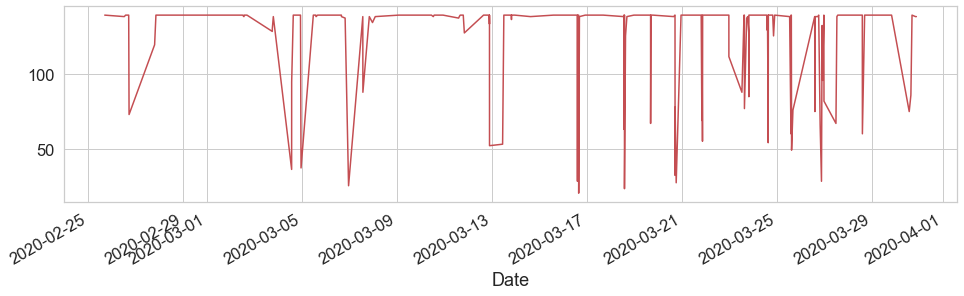

In [276]:
# Longitud de los tweets a lo largo del tiempo:
tlen.plot(figsize=(16,4), color='r');
#Esto crea el siguiente resultado:

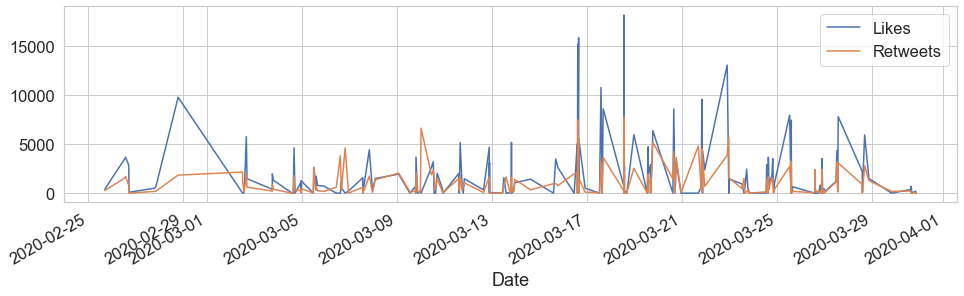

In [277]:
# Y para trazar los me gusta vs visualización de retweets:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### Gráficos circulares de fuentes

Ya casi hemos terminado con esta segunda sección de la publicación. Ahora trazaremos las fuentes en un gráfico circular, ya que nos dimos cuenta de que no todos los tweets se twittean desde la misma fuente. Primero limpiamos todas las fuentes:

In [278]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))
    
# Con el siguiente resultado, nos damos cuenta de que, 
# básicamente, esta cuenta de Twitter tiene tres fuentes:

Creation of content sources:
* Twitter for iPhone
* Twitter Web App
* Twitter Web Client


Ahora contamos el número de cada fuente y creamos un gráfico circular. Notarás que esta celda de código no es la más optimizada ... Ten en cuenta que eran las 4 de la mañana cuando estaba diseñando este taller.

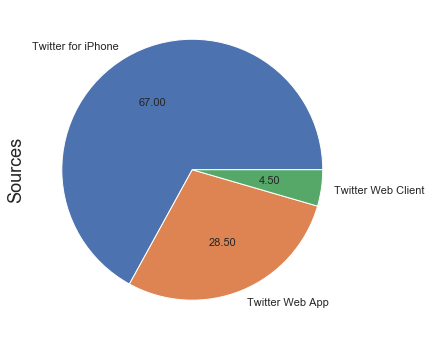

In [280]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# Con esto obtenemos una salida como esta:
# Y podemos ver el porcentaje de tweets por fuente.

# Ahora podemos proceder a hacer un análisis de sentimientos.

3. Análisis de sentimientos
3.1. Importando textblob

Como mencionamos al principio de esta publicación, textblob nos permitirá hacer análisis de sentimientos de una manera muy simple. También usaremos la biblioteca `re` de Python, que se usa para trabajar con expresiones regulares. Para esto, le proporcionaré dos funciones de utilidad para: a) limpiar el texto (lo que significa que cualquier símbolo distinto de un valor alfanumérico se reasignará en uno nuevo que satisfaga esta condición), yb) cree un clasificador para analizar el polaridad de cada tweet después de limpiar el texto que contiene. No explicaré la forma específica en que funciona la función que limpia, ya que se ampliaría y podría entenderse mejor en la documentación oficial.

El código que estoy proporcionando es:

In [281]:
from textblob import TextBlob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    
# &amp; is the character reference for "An ampersand". While gt is simply we call it as (greater than).   
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

La forma en que funciona es que textblob ya proporciona un analizador entrenado. Textblob puede trabajar con diferentes modelos de aprendizaje automático utilizados en el procesamiento del lenguaje natural. 
Agregaremos una columna adicional a nuestros datos. Esta columna contendrá el análisis de opinión y podemos trazar el marco de datos para ver la actualización:

In [283]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
 
# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @Muni_Recoleta: Recuerda estas recomendacio...,139,1244727857244504067,2020-03-30 20:47:01,Twitter for iPhone,0,18,0
1,Hoy el acceso a herramientas que aporten al fo...,139,1244714703860924417,2020-03-30 19:54:45,Twitter for iPhone,193,74,0
2,@Optimis03757984 @TREMENDAFACHA @PCdeChile @se...,140,1244661691956244481,2020-03-30 16:24:06,Twitter Web App,22,0,0
3,@TREMENDAFACHA @PCdeChile @sebastianpinera rev...,88,1244645076103553025,2020-03-30 15:18:05,Twitter Web App,708,28,0
4,Comparto: Derechos de los trabajadores en tiem...,86,1244644194997751808,2020-03-30 15:14:35,Twitter for iPhone,198,186,0
5,Caso primera línea: ilegalidad en tiempos de c...,75,1244618851901456386,2020-03-30 13:33:52,Twitter for iPhone,345,218,0
6,RT @ghidalgoa: no olvido\nNo perdono\nNo me re...,140,1244349973908553728,2020-03-29 19:45:27,Twitter Web App,0,179,0
7,Los partidarios del modelo siempre justifican ...,140,1244004564761788416,2020-03-28 20:52:55,Twitter for iPhone,1495,1271,0
8,No cree usted señor @sebastianpinera que se le...,140,1243938989972885505,2020-03-28 16:32:21,Twitter for iPhone,5947,2811,0
9,@JsvergaraS No se puede guardar silencio ante ...,60,1243904802230349828,2020-03-28 14:16:30,Twitter for iPhone,94,12,0


Como podemos ver, la última columna contiene el análisis de sentimientos (SA). Ahora solo necesitamos verificar los resultados.

### Analizando los resultados

Para tener una manera simple de verificar los resultados, contaremos el número de tweets neutrales, positivos y negativos y extraeremos los porcentajes.

In [284]:
# We construct lists with classified tweets:
 
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [285]:
#### Ahora que tenemos las listas, solo imprimimos los porcentajes:

In [186]:
# We print percentages:
 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 5.0%
Percentage of neutral tweets: 94.5%
Percentage de negative tweets: 0.5%


Tenemos que considerar que solo estamos trabajando con los 200 tweets más recientes de D. Trump (última actualización: 2 de septiembre). Para obtener resultados más precisos, podemos considerar más tweets. Una cosa interesante (una invitación a los lectores) es analizar la polaridad de los tweets de diferentes fuentes, podría ser determinista que al considerar solo los tweets de una fuente, la polaridad resultaría más positiva / negativa. 

# 4 extrayendo la data de un cvs:

https://www.kaggle.com/priyaananthram/sentiment-analysis-of-tweets

In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
tweets=pd.read_csv("danieljadue_tweets.csv",encoding = "ISO-8859-1")
tweets.head()

,screen_name,name,twitter_id,description,year,month,date,time,tweet_id,tweet.text
0,danieljadue,Daniel Jadue #YoApruebo,146542753,"b'Alcalde de la comuna de Recoleta, Arquitecto...",2020,3,27,13.52,1243536325300695040,b'Nuevamente @jmanalich err\xc3\xb3 en sus pro...
1,danieljadue,Daniel Jadue #YoApruebo,146542753,"b'Alcalde de la comuna de Recoleta, Arquitecto...",2020,3,27,13.21,1243528650655293442,"b'David Carroll, acad\xc3\xa9mico que denunci\..."
2,danieljadue,Daniel Jadue #YoApruebo,146542753,"b'Alcalde de la comuna de Recoleta, Arquitecto...",2020,3,27,12.31,1243516014995869699,b'Es una verg\xc3\xbcenza lo que ha hecho @seb...
3,danieljadue,Daniel Jadue #YoApruebo,146542753,"b'Alcalde de la comuna de Recoleta, Arquitecto...",2020,3,27,11.33,1243501484228124672,b'y nunca dijeron la verdad #renunciama\xc3\xb...
4,danieljadue,Daniel Jadue #YoApruebo,146542753,"b'Alcalde de la comuna de Recoleta, Arquitecto...",2020,3,26,23.28,1243319006758608896,b'@Jazminlagos25 Claro que si. Le dejo el link...


In [ ]:
Falta:

1 grafica obj-subj pos-neg
2 analisisen tiempo eal delos tweets
3 ubicacion geografica de los tweets emitidos